In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.errors import EmptyDataError

sns.set_theme()
sns.set_palette("colorblind")

In [15]:
parallel_1000iter = pd.read_csv("1r-1000i-PARALLEL.csv")
critical_1000iter = pd.read_csv("1r-1000i-CRITICAL.csv")
barrier_1000iter = pd.read_csv("1r-1000i-BARRIER.csv")
parallel_1000runs = pd.read_csv("1000r-20i-PARALLEL.csv")
critical_1000runs = pd.read_csv("1000r-20i-CRITICAL.csv")
barrier_1000runs = pd.read_csv("1000r-20i-BARRIER.csv")

In [ ]:
parallel_delay = pd.read_csv("archer2-1000i-PARALLEL-DELAY.csv")
archer2_5r_1000i_parallel = pd.read_csv("archer2-5r-1000i-PARALLEL.csv")

In [2]:
archer2_1000i_atomic = pd.read_csv("archer2-1000i-ATOMIC.csv")
archer2_1000i_atomic_seqcst = pd.read_csv("archer2-1000i-ATOMIC_SEQCST.csv")
archer2_1000i_barrier_var = pd.read_csv("archer2-1000i-BARRIER_VAR.csv")
archer2_1000i_lock_contended = pd.read_csv("archer2-1000i-LOCK_CONTENDED.csv")
archer2_1000i_lock_contended_hint = pd.read_csv("archer2-1000i-LOCK_CONTENDED_HINT.csv")
archer2_1000i_lock_uncontended = pd.read_csv("archer2-1000i-LOCK_UNCONTENDED.csv")
archer2_1000i_lock_uncontended_hint = pd.read_csv("archer2-1000i-LOCK_UNCONTENDED_HINT.csv")
archer2_1000i_schedbench = pd.read_csv("archer2-1000i-schedbench.csv")

In [4]:
archer2_1000n_parallel = pd.read_csv("archer2-1000n-1r-20i-PARALLEL.csv")

In [14]:
# parallel_1000runs["mean"] = parallel_1000runs.groupby(["name","cores","compiler","node","cluster"])["time"].transform(np.mean)

In [3]:
parallel_delay["mean"] = parallel_delay.groupby(["name","cores","compiler","delay","node","cluster"])["time"].transform(np.mean)
parallel_delay = parallel_delay.drop_duplicates(subset=['delay','cores','compiler','name'])
parallel_delay = parallel_delay.reset_index(drop=True)
rdf = parallel_delay[parallel_delay["name"] == "reference time 1"]
rdf = rdf[["cores","compiler","delay","cluster","mean"]]
rdf.rename(columns={"mean":"ref"}, inplace=True)
parallel_delay = parallel_delay.merge(rdf, how="left", on=["compiler","cores","cluster","delay"])
parallel_delay["weighted time"] = parallel_delay["mean"] - parallel_delay["ref"]
del rdf

In [3]:
rdf = archer2_1000i_schedbench[archer2_1000i_schedbench["name"] == "reference time"]
rdf = rdf[["cores","compiler","delay","node","cluster","mean"]]
rdf.rename(columns={"mean":"ref"}, inplace=True)

In [ ]:
archer2_1000i_schedbench.merge(rdf, how="right", on=["compiler","cores","cluster","node","delay"])
archer2_1000i_schedbench["weighted time"] = archer2_1000i_schedbench["mean"] - archer2_1000i_schedbench["ref"]

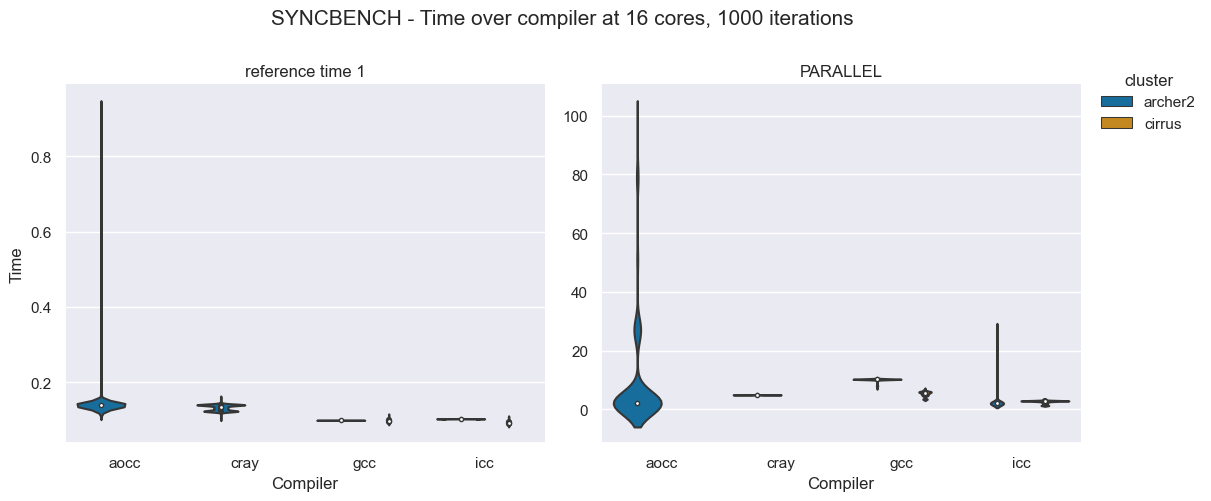

In [4]:
rdf = parallel_1000iter[parallel_1000iter["benchmark"] == "syncbench"]
rdf = rdf[rdf["cores"] == 16]
title="SYNCBENCH - Time over compiler at 16 cores, 1000 iterations";
plot = sns.catplot(data=rdf, x='compiler', y="time", hue="cluster", split=False, kind='violin', col='name',sharey=False,sharex=False)
plot.set_axis_labels("Compiler", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

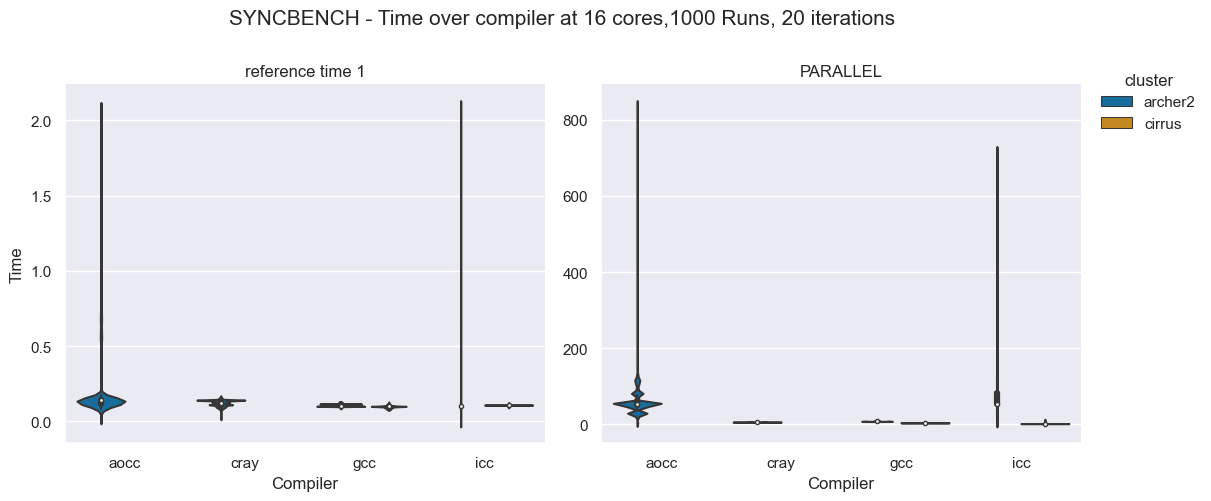

In [5]:
rdf = parallel_1000runs[parallel_1000runs["benchmark"] == "syncbench"]
rdf = rdf[rdf["cores"] == 16]
title="SYNCBENCH - Time over compiler at 16 cores,1000 Runs, 20 iterations";
plot = sns.catplot(data=rdf, x='compiler', y="time", hue="cluster", split=False, kind='violin', col='name',sharey=False,sharex=False)
plot.set_axis_labels("Compiler", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

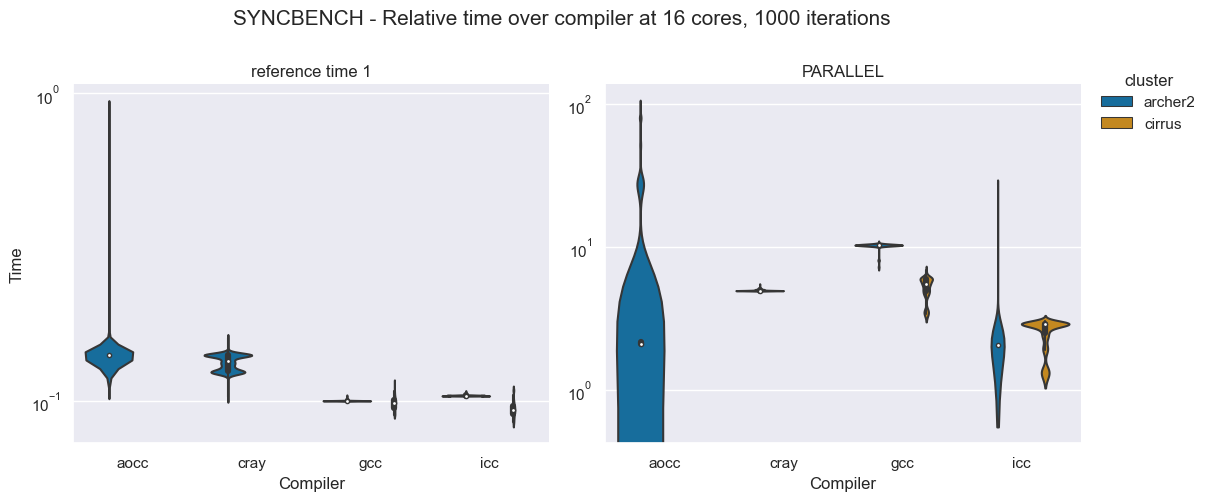

In [6]:
rdf = parallel_1000iter[parallel_1000iter["benchmark"] == "syncbench"]
rdf = rdf[rdf["cores"] == 16]
title="SYNCBENCH - Relative time over compiler at 16 cores, 1000 iterations";
plot = sns.catplot(data=rdf, x='compiler', y="time", hue="cluster", split=False, kind='violin', col='name',sharey=False,sharex=False)
for ax in plot.fig.axes:
    ax.set_yscale('log')
plot.set_axis_labels("Compiler", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

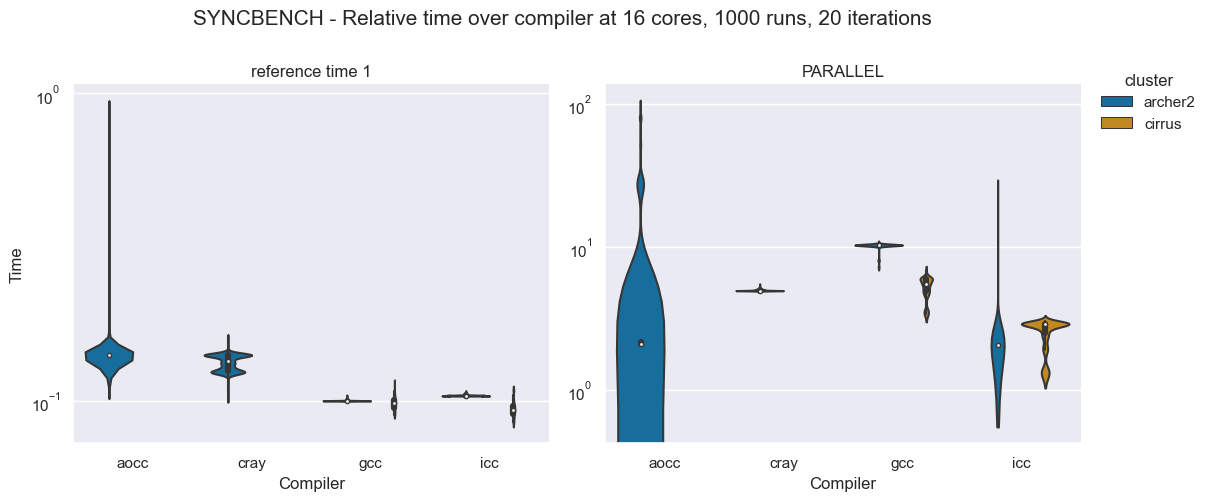

In [7]:
rdf = parallel_1000iter[parallel_1000iter["benchmark"] == "syncbench"]
rdf = rdf[rdf["cores"] == 16]
title="SYNCBENCH - Relative time over compiler at 16 cores, 1000 runs, 20 iterations";
plot = sns.catplot(data=rdf, x='compiler', y="time", hue="cluster", split=False, kind='violin', col='name',sharey=False,sharex=False)
for ax in plot.fig.axes:
    ax.set_yscale('log')
plot.set_axis_labels("Compiler", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

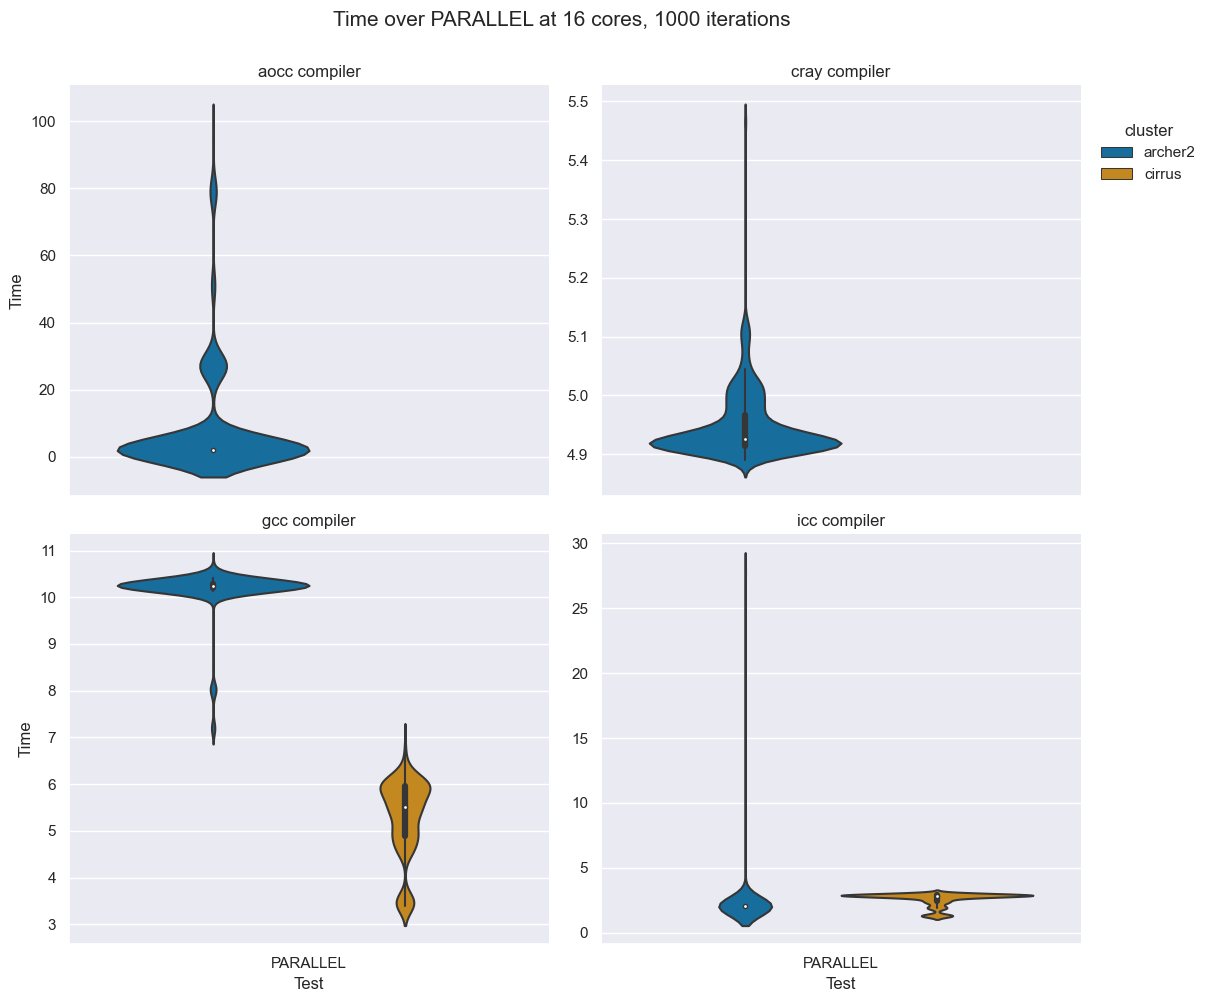

In [8]:
rdf = parallel_1000iter[parallel_1000iter["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="Time over PARALLEL at 16 cores, 1000 iterations";
plot = sns.catplot(data=rdf, x='name', y="time", hue="cluster", split=False, kind='violin', col='compiler',col_wrap=2,sharey=False,sharex=True)
plot.set_axis_labels("Test", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

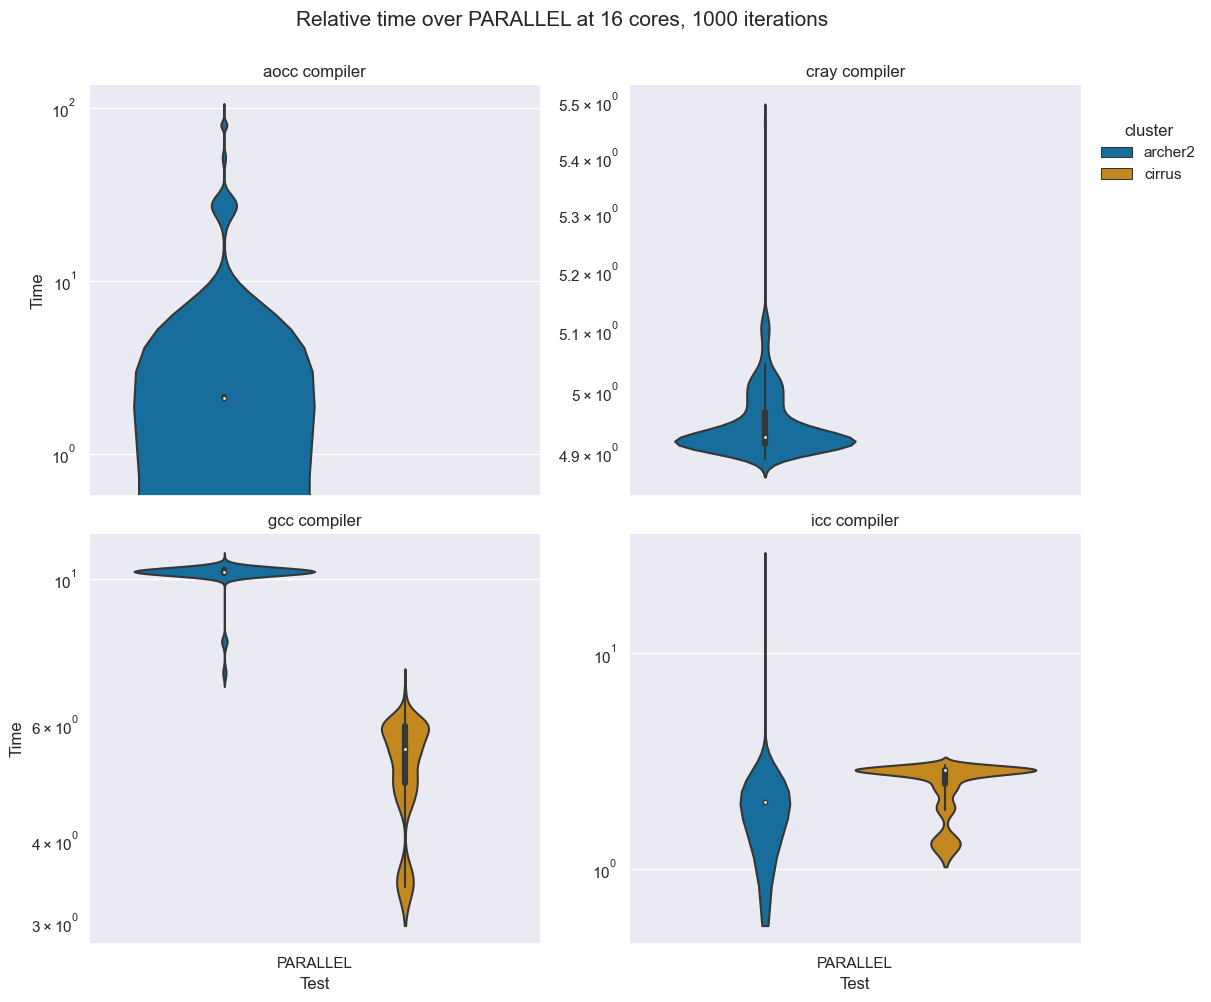

In [9]:
rdf = parallel_1000iter[parallel_1000iter["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="Relative time over PARALLEL at 16 cores, 1000 iterations";
plot = sns.catplot(data=rdf, x='name', y="time", hue="cluster", split=False, kind='violin', col='compiler',col_wrap=2,sharey=False,sharex=True)
for ax in plot.fig.axes:
    ax.set_yscale('log')
plot.set_axis_labels("Test", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_53145/138600340.py:10: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


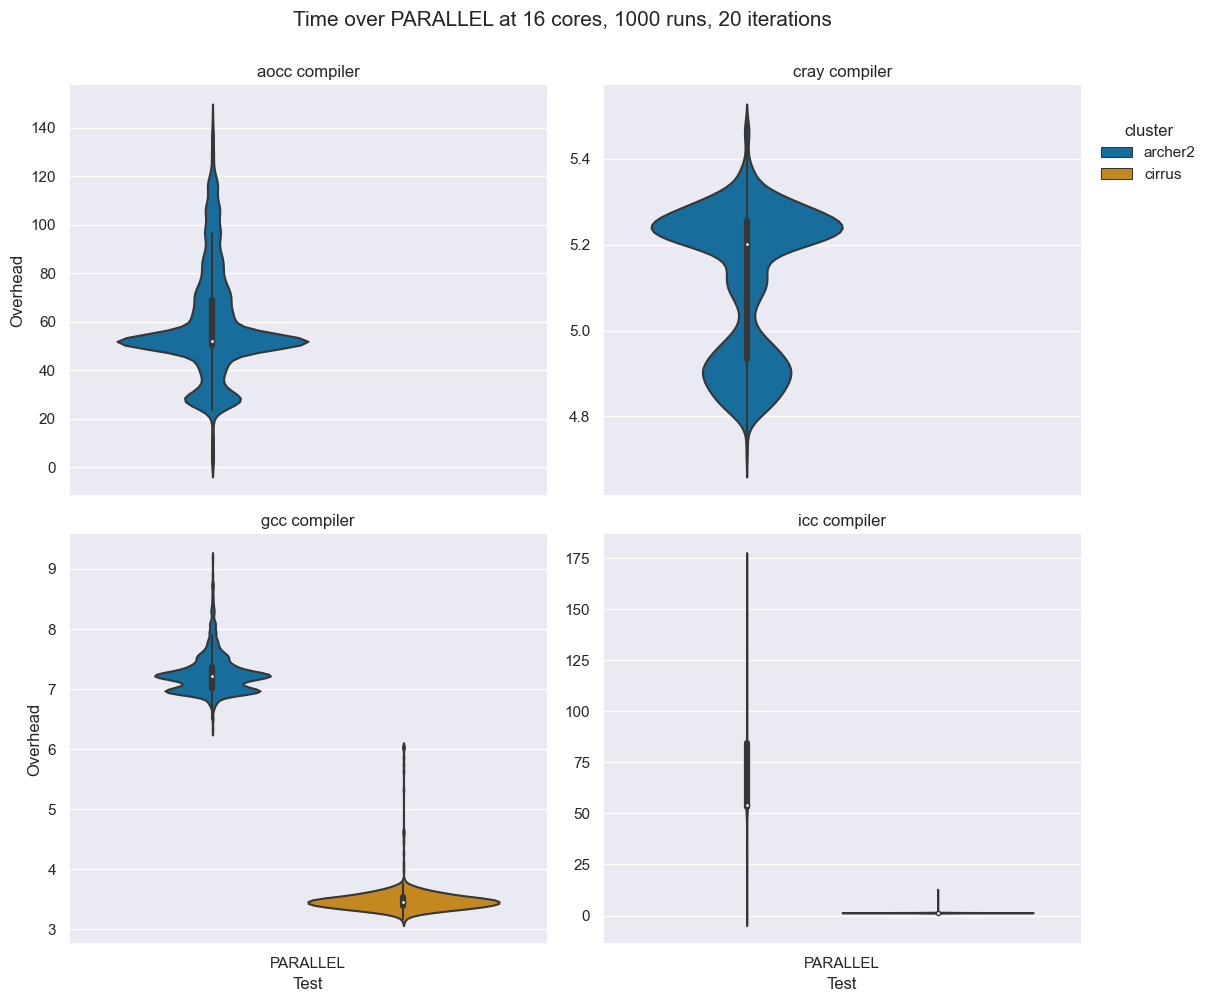

In [19]:
rdf = parallel_1000runs[parallel_1000runs["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="Time over PARALLEL at 16 cores, 1000 runs, 20 iterations";
plot = sns.catplot(data=rdf, x='name', y="mean", hue="cluster", split=False, kind='violin', col='compiler',col_wrap=2,sharey=False,sharex=True)
plot.set_axis_labels("Test", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_53145/119323235.py:12: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


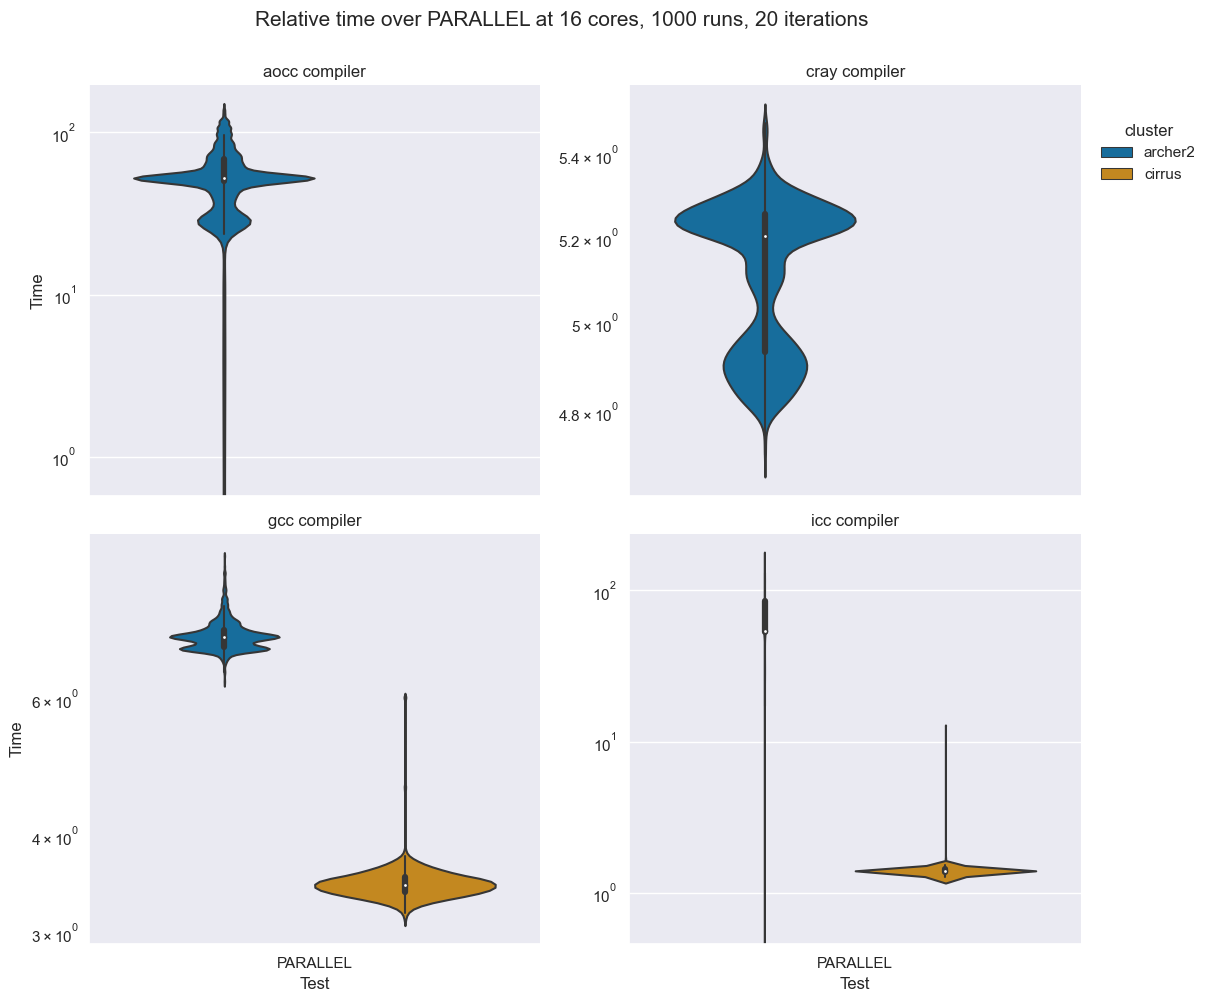

In [17]:
rdf = parallel_1000runs[parallel_1000runs["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="Relative time over PARALLEL at 16 cores, 1000 runs, 20 iterations";
plot = sns.catplot(data=rdf, x='name', y="mean", hue="cluster", split=False, kind='violin', col='compiler',col_wrap=2,sharey=False,sharex=True)
for ax in plot.fig.axes:
    ax.set_yscale('log')
plot.set_axis_labels("Test", "Time")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

In [12]:
# rdf = parallel_delay_16c[parallel_delay_16c["name"] == "PARALLEL"]
# title="PARALLEL - Archer2 Delay distribution, overhead across compilers at 16 cores,1000 iterations"
# plot = sns.catplot(data=rdf, x='compiler', y="time", hue="cluster", split=False, kind='violin', col='delay',col_wrap=2,sharey=False,sharex=True)
# plot.set_axis_labels("Test", "Overhead")
# plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
# sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
# plot.set_titles("Delay of {col_name}")
# # plot.set_xticklabels(rotation=90)
# plot.fig.tight_layout()
# plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
# del rdf

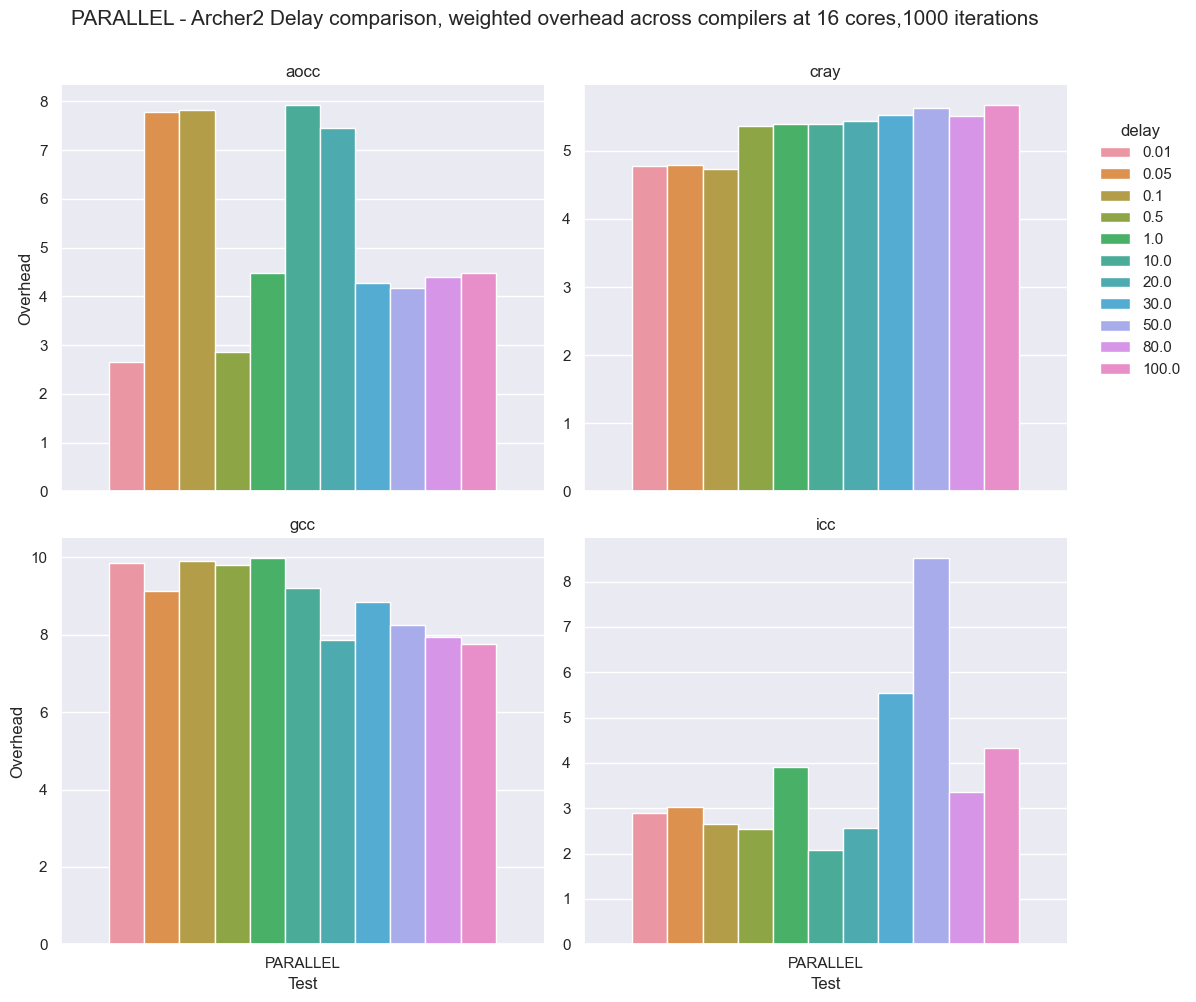

In [40]:
rdf = parallel_delay[parallel_delay["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="PARALLEL - Archer2 Delay comparison, weighted overhead across compilers at 16 cores,1000 iterations"
plot = sns.catplot(data=rdf, x='name', y="weighted time", hue="delay", kind='bar', col='compiler',col_wrap=2,sharey=False,sharex=True)
plot.set_axis_labels("Test", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

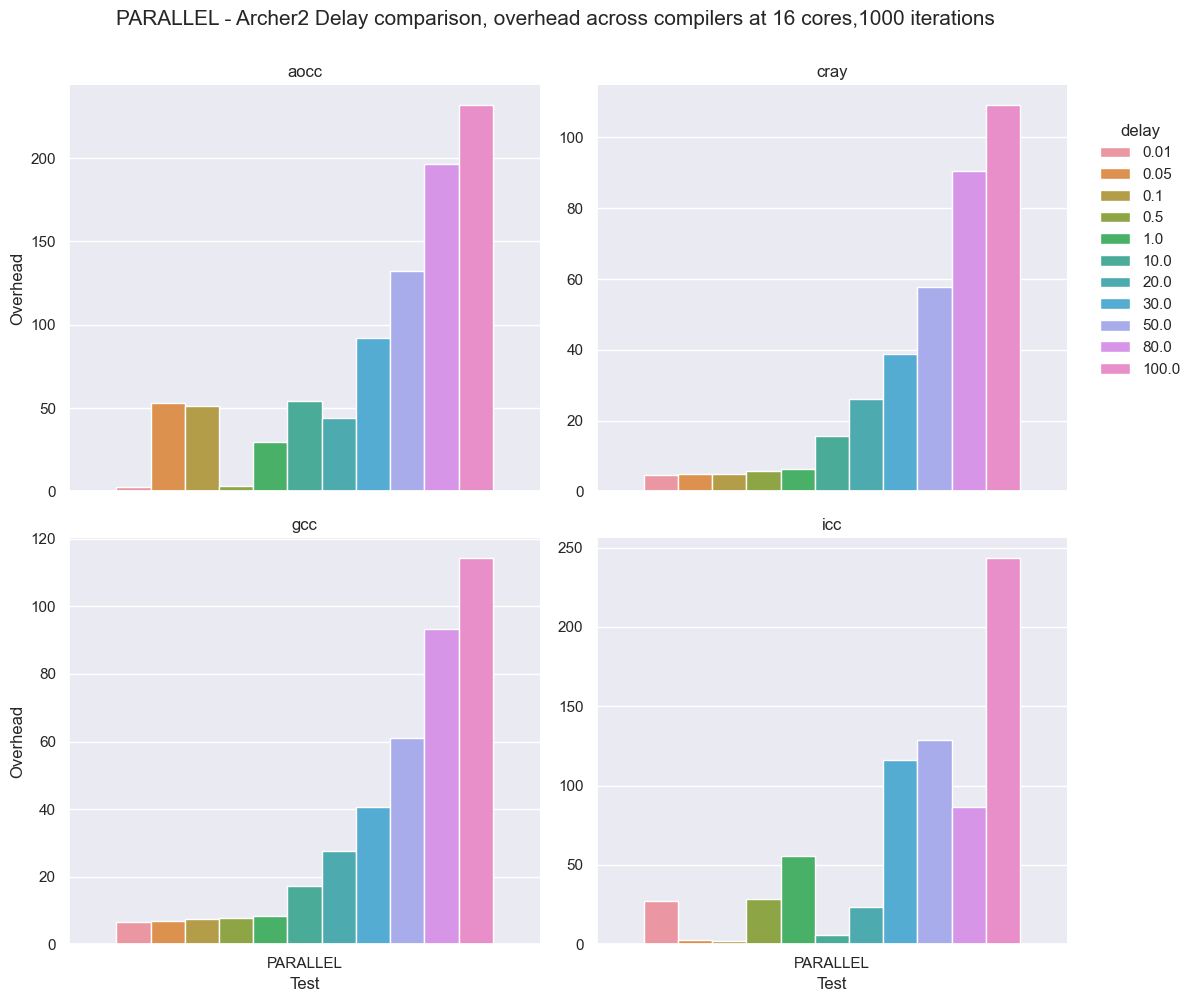

In [41]:
rdf = parallel_delay[parallel_delay["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="PARALLEL - Archer2 Delay comparison, overhead across compilers at 16 cores,1000 iterations"
plot = sns.catplot(data=rdf, x='name', y="time", hue="delay", kind='bar', col='compiler',col_wrap=2,sharey=False,sharex=True)
plot.set_axis_labels("Test", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

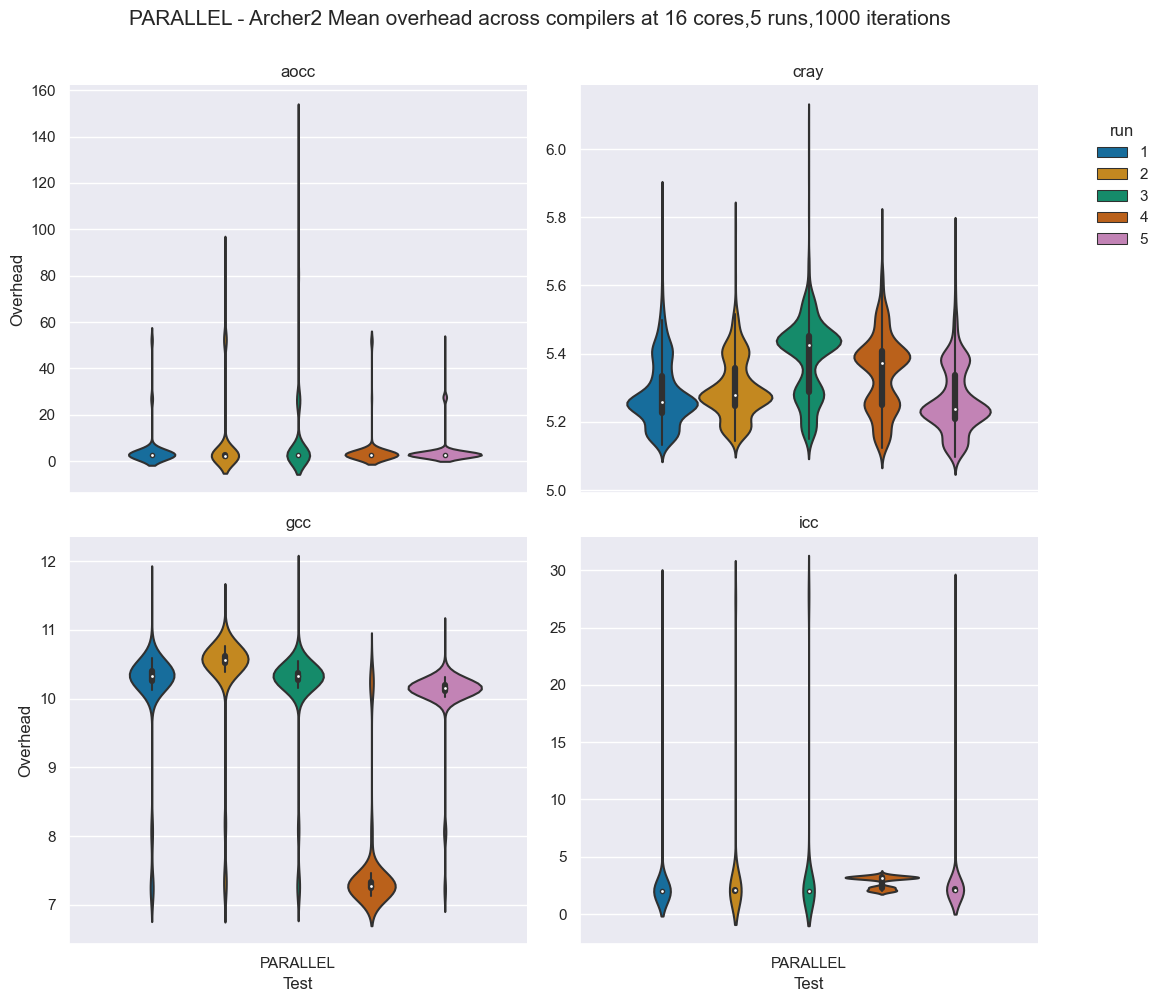

In [14]:
rdf = archer2_5r_1000i_parallel[archer2_5r_1000i_parallel["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
title="PARALLEL - Archer2 Mean overhead across compilers at 16 cores,5 runs,1000 iterations";
plot = sns.catplot(data=rdf, x='name', y="time", hue="run", split=False, kind='violin', col='compiler',col_wrap=2,sharey=False,sharex=True)
plot.set_axis_labels("Test", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

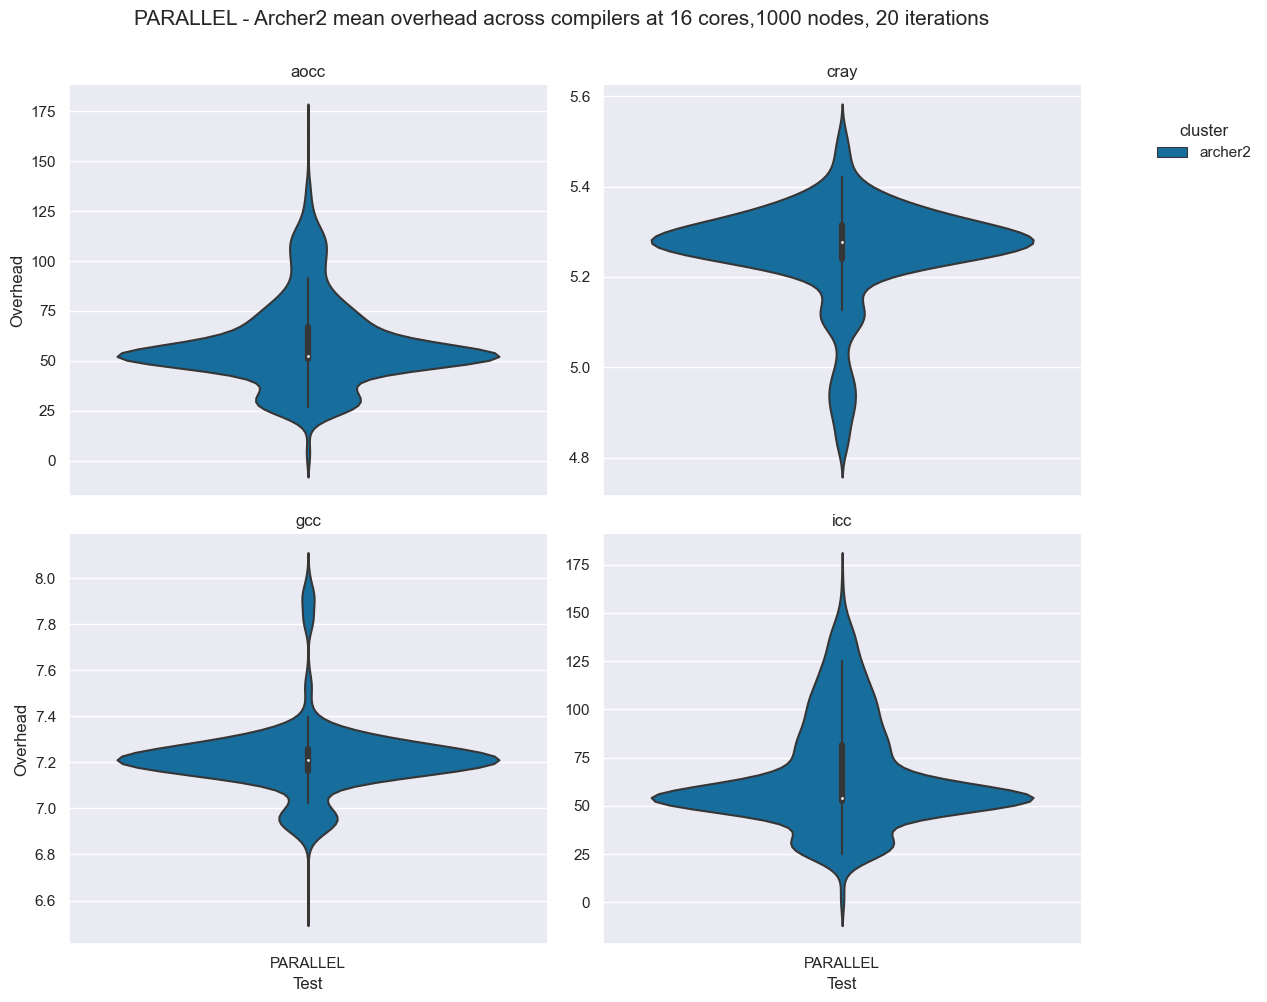

In [15]:
rdf = archer2_1000n_parallel[archer2_1000n_parallel["name"] == "PARALLEL"]
rdf = rdf[rdf["cores"] == 16]
rdf = rdf.drop_duplicates(subset=['node','compiler'], keep='last')
title="PARALLEL - Archer2 mean overhead across compilers at 16 cores,1000 nodes, 20 iterations"
plot = sns.catplot(data=rdf, x='name', y="mean", hue="cluster", kind='violin', col='compiler',col_wrap=2,sharey=False,sharex=True)
plot.set_axis_labels("Test", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

C:\Users\Jojo\AppData\Local\Temp\ipykernel_41728\1247294813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf["chunk size"] = rdf["chunk size"].astype(int)


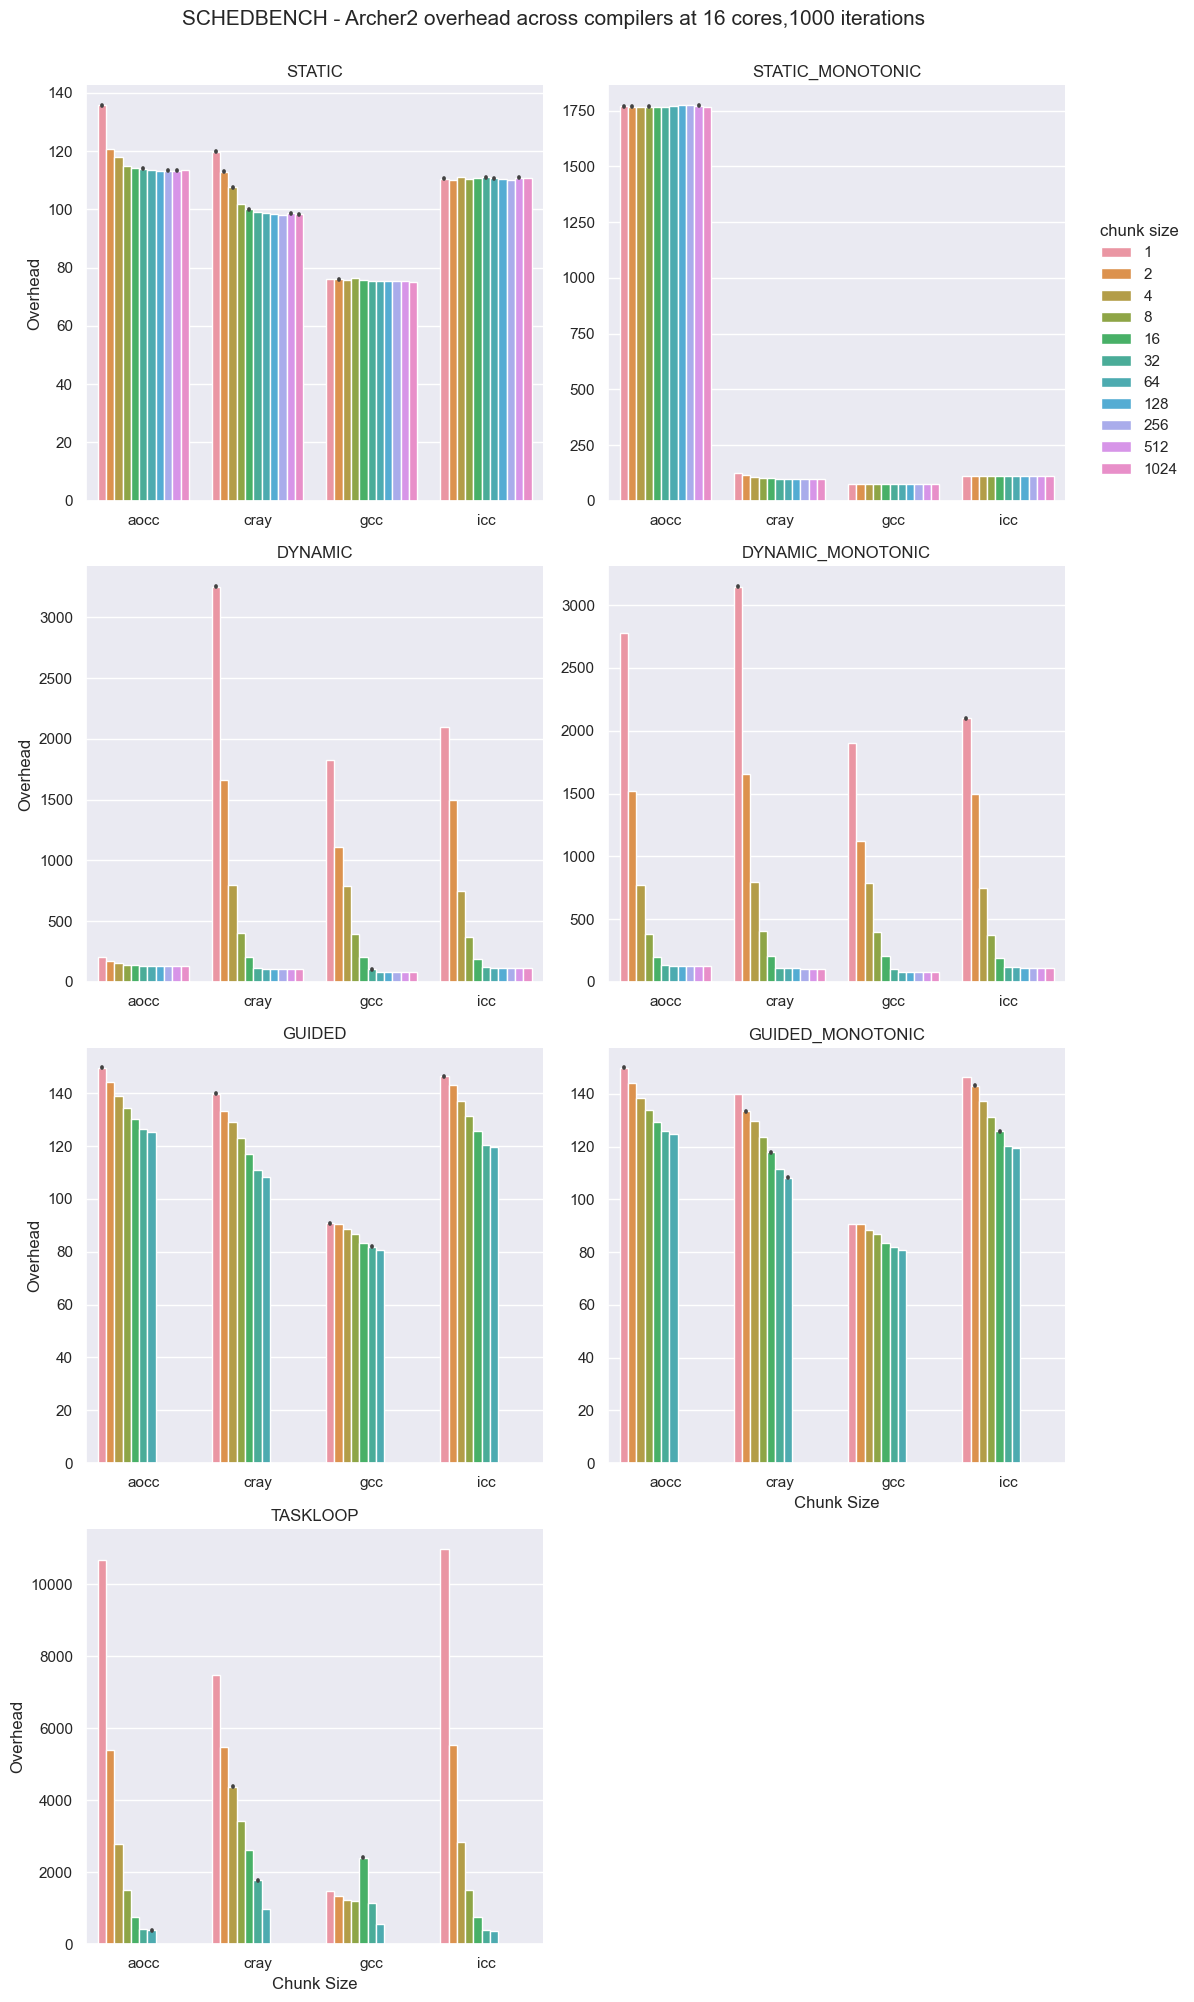

In [16]:
rdf = archer2_1000i_schedbench.dropna(subset=["chunk size"])
rdf["chunk size"] = rdf["chunk size"].astype(int)
title="SCHEDBENCH - Archer2 overhead across compilers at 16 cores,1000 iterations"
plot = sns.catplot(data=rdf, x='compiler', y="time", hue="chunk size", kind='bar', col='name',col_wrap=2,sharey=False,sharex=False)
plot.set_axis_labels("Chunk Size", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

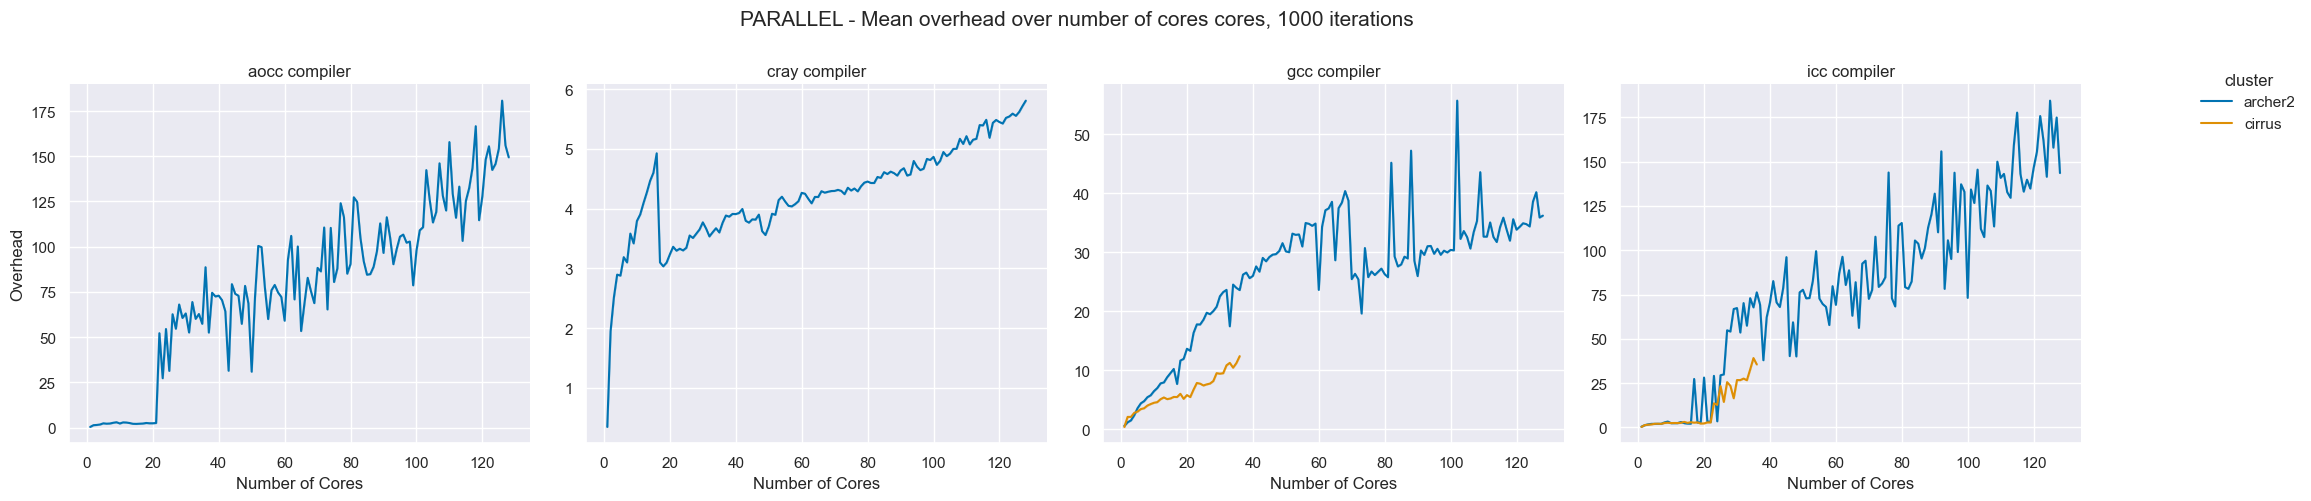

In [17]:
#plot speedup graph
rdf = parallel_1000iter[parallel_1000iter["name"] == "PARALLEL"]
title="PARALLEL - Mean overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="compiler",hue="cluster",facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

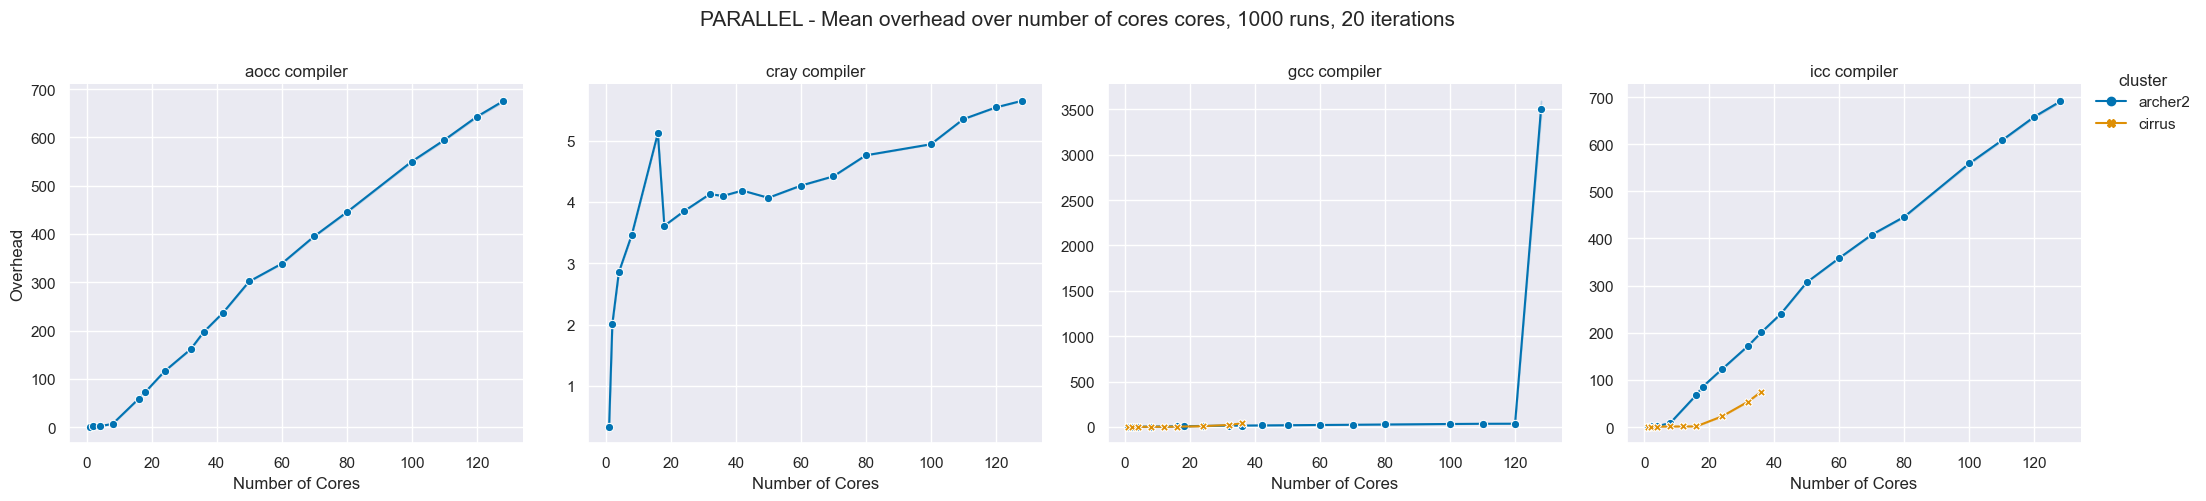

In [18]:
#plot speedup graph
rdf = parallel_1000runs[parallel_1000runs["name"] == "PARALLEL"]
title="PARALLEL - Mean overhead over number of cores cores, 1000 runs, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="cluster",style="cluster",dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_54104/1426796400.py:10: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


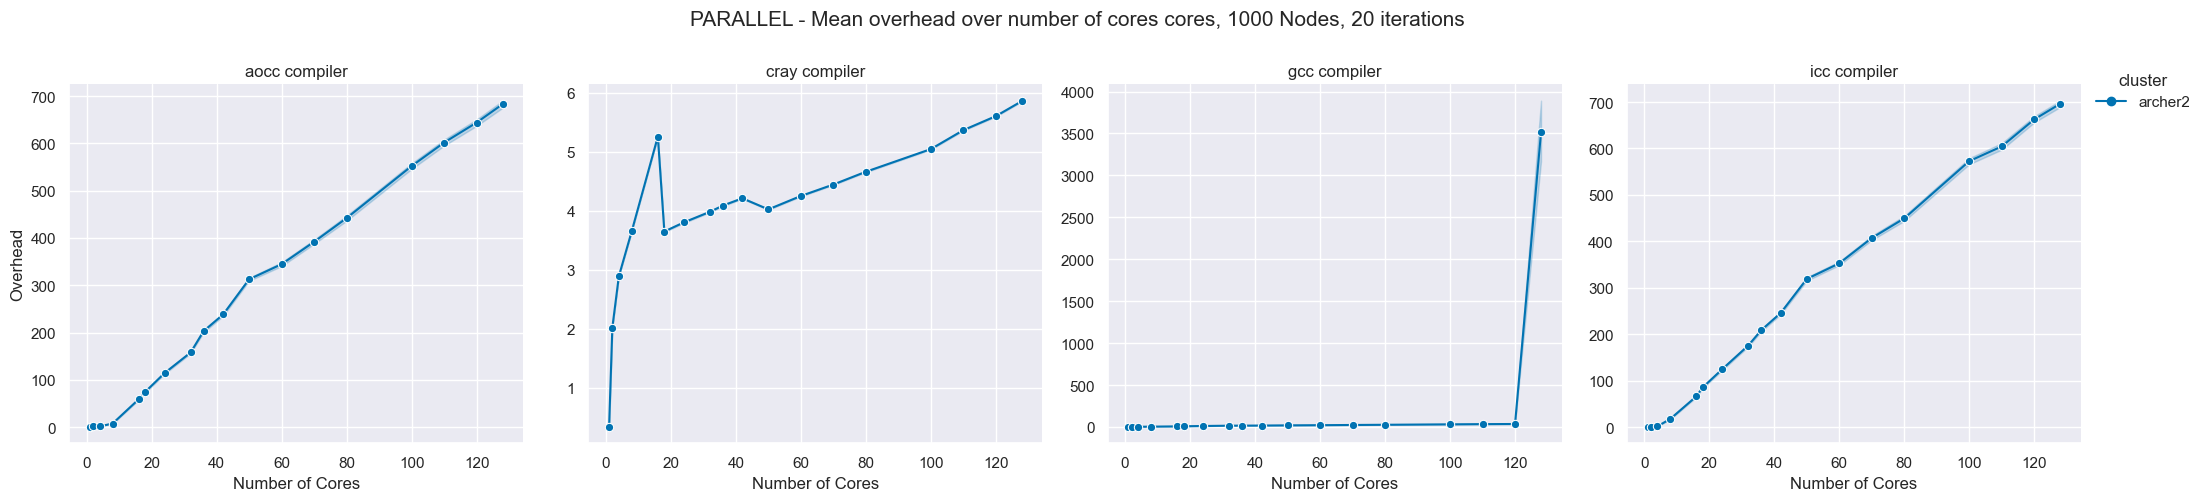

In [5]:
rdf = archer2_1000n_parallel[archer2_1000n_parallel["name"] == "PARALLEL"]
rdf = rdf.drop_duplicates(subset=['node','compiler','cores'], keep='last')
title="PARALLEL - Mean overhead over number of cores cores, 1000 Nodes, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="cluster",style="cluster",dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

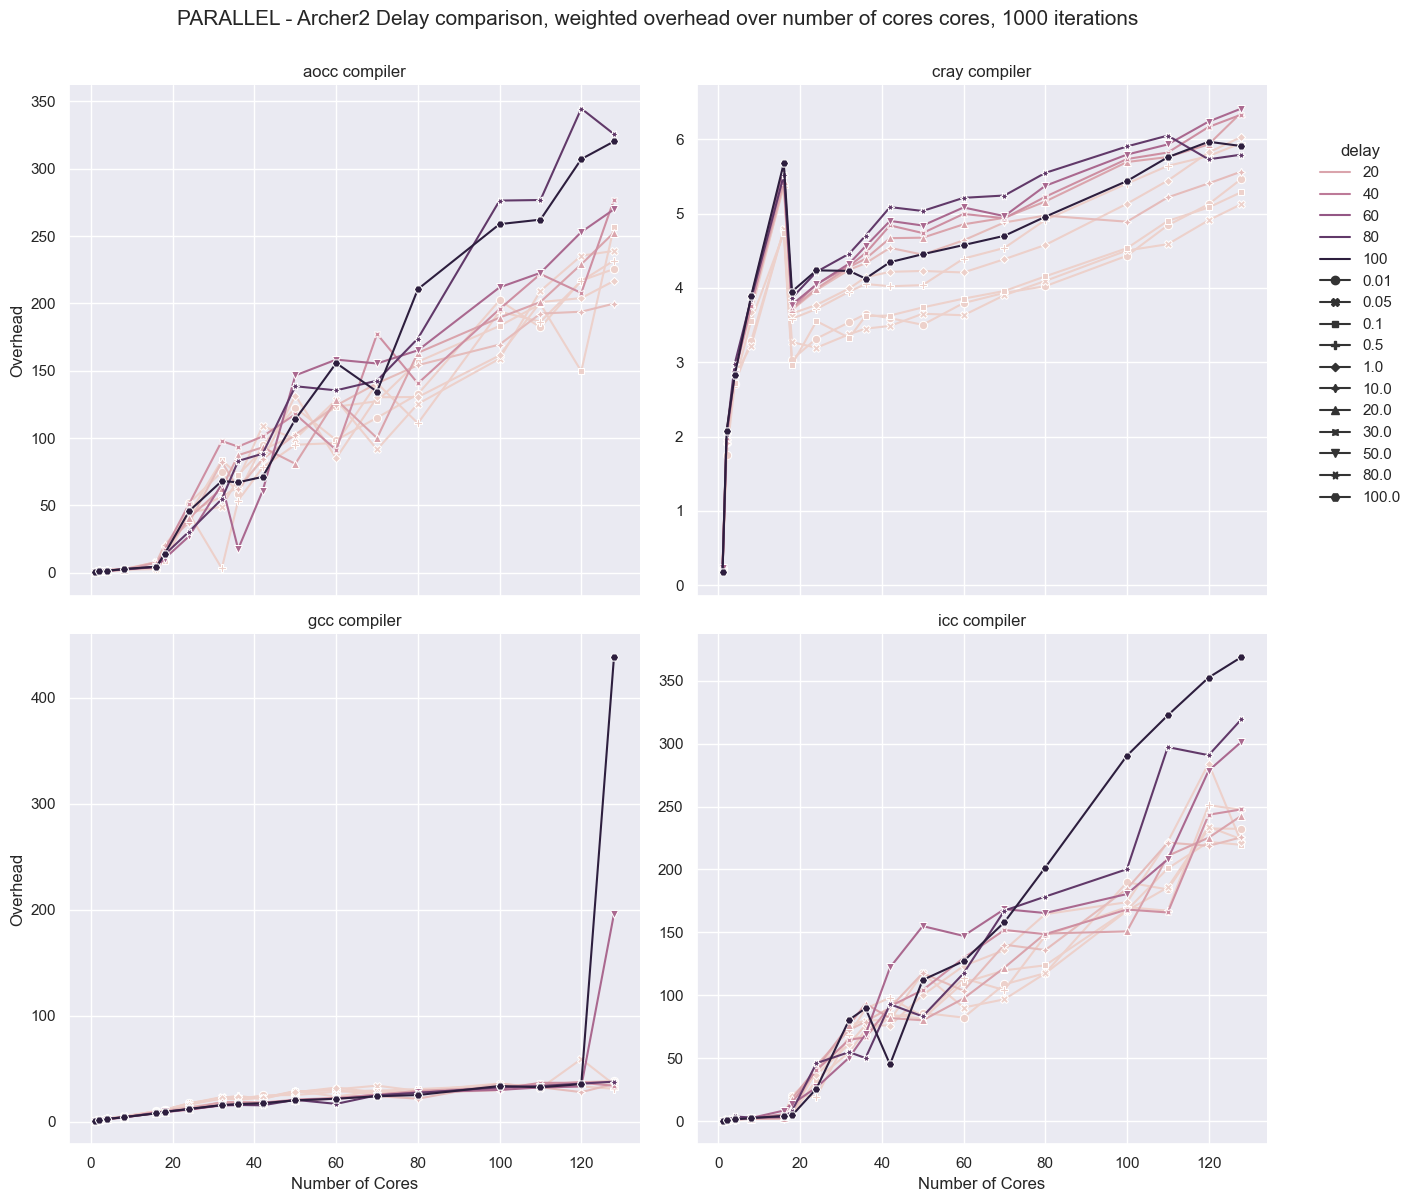

In [20]:
rdf = parallel_delay[parallel_delay["name"] == "PARALLEL"]
title="PARALLEL - Archer2 Delay comparison, weighted overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="weighted time", kind="line",col="compiler",hue="delay",style="delay",height=6, aspect=1,col_wrap=2,dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

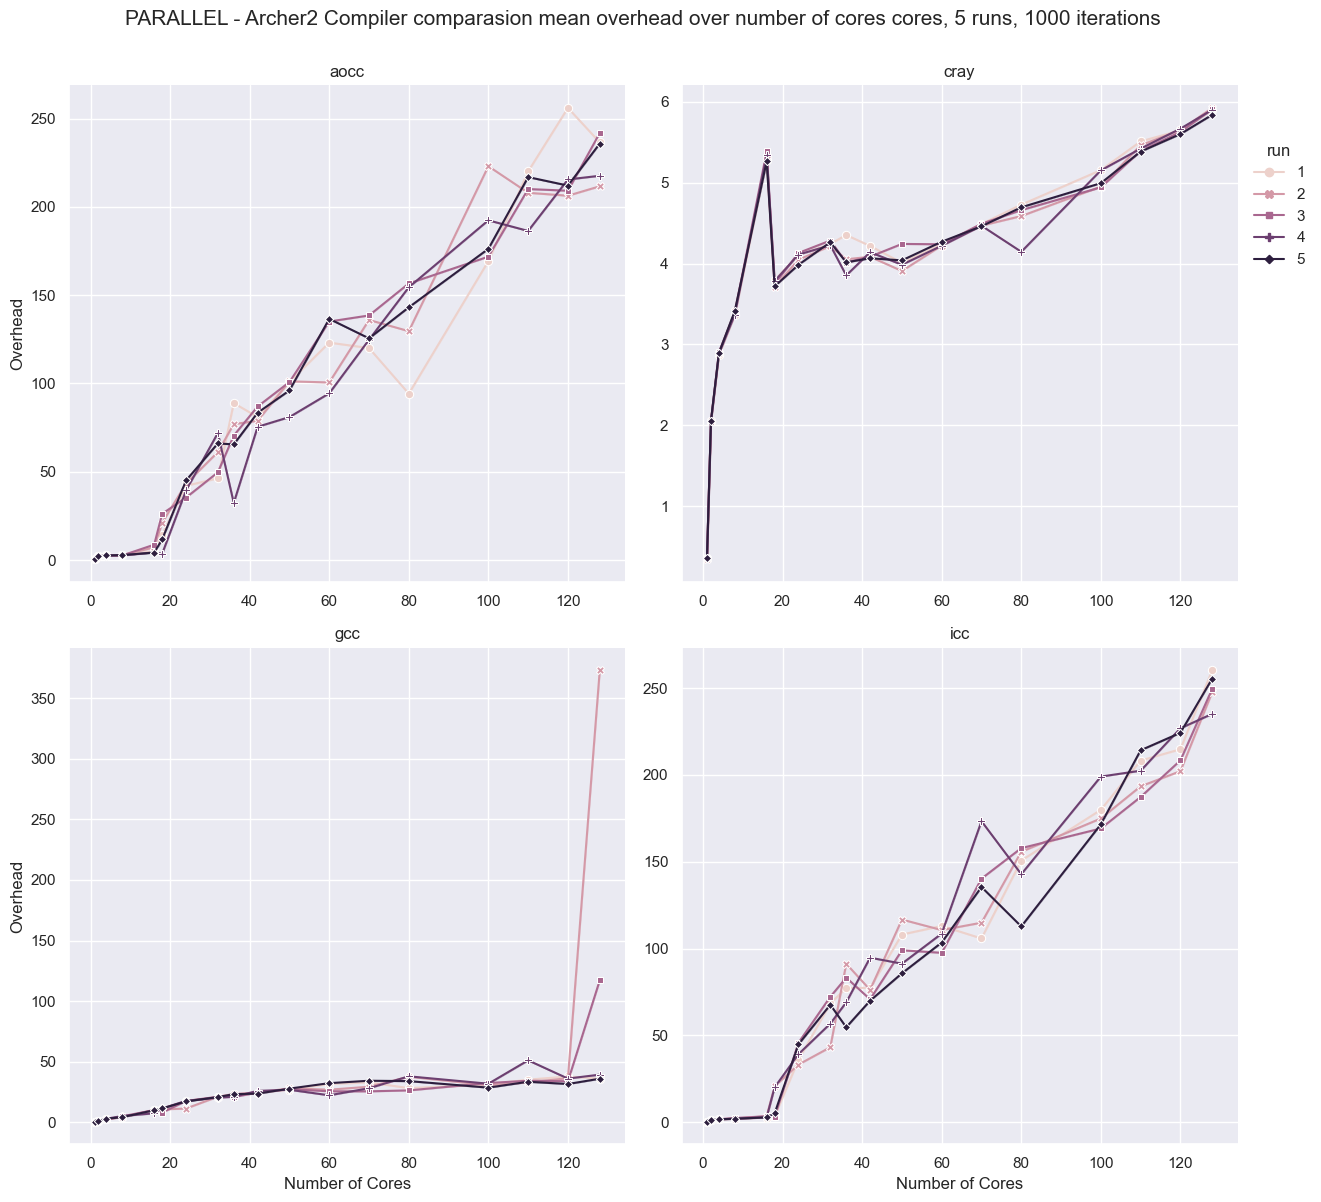

In [21]:
#plot speedup graph
rdf = archer2_5r_1000i_parallel[archer2_5r_1000i_parallel["name"] == "PARALLEL"]
title="PARALLEL - Archer2 Compiler comparasion mean overhead over number of cores cores, 5 runs, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="run",style="run",height=6, aspect=1,col_wrap=2,dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_53145/465989124.py:10: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


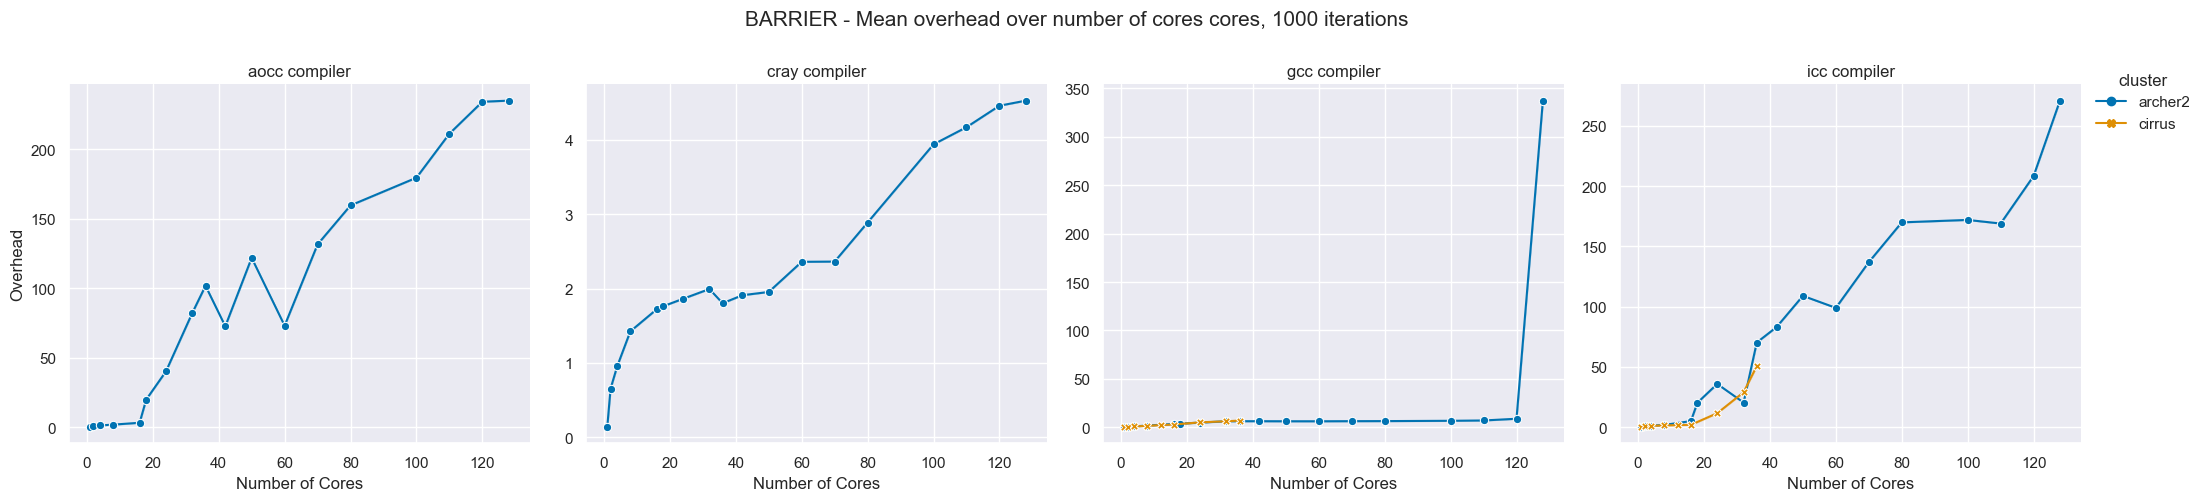

In [5]:
#plot speedup graph
rdf = barrier_1000iter[barrier_1000iter["name"] == "BARRIER"]
title="BARRIER - Mean overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="cluster",style="cluster",dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

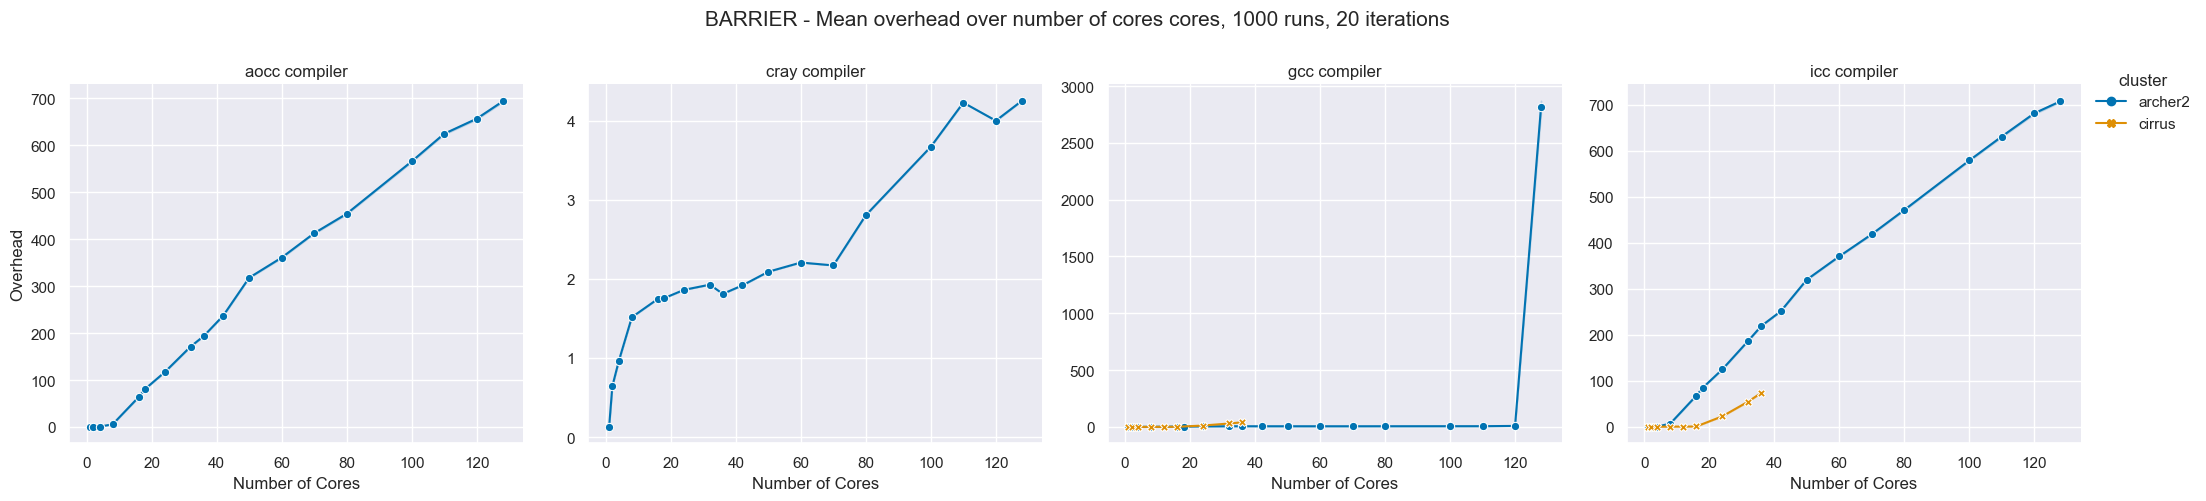

In [22]:
#plot speedup graph
rdf = barrier_1000runs[barrier_1000runs["name"] == "BARRIER"]
title="BARRIER - Mean overhead over number of cores cores, 1000 runs, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="cluster",style="cluster",dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_53145/494000858.py:10: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


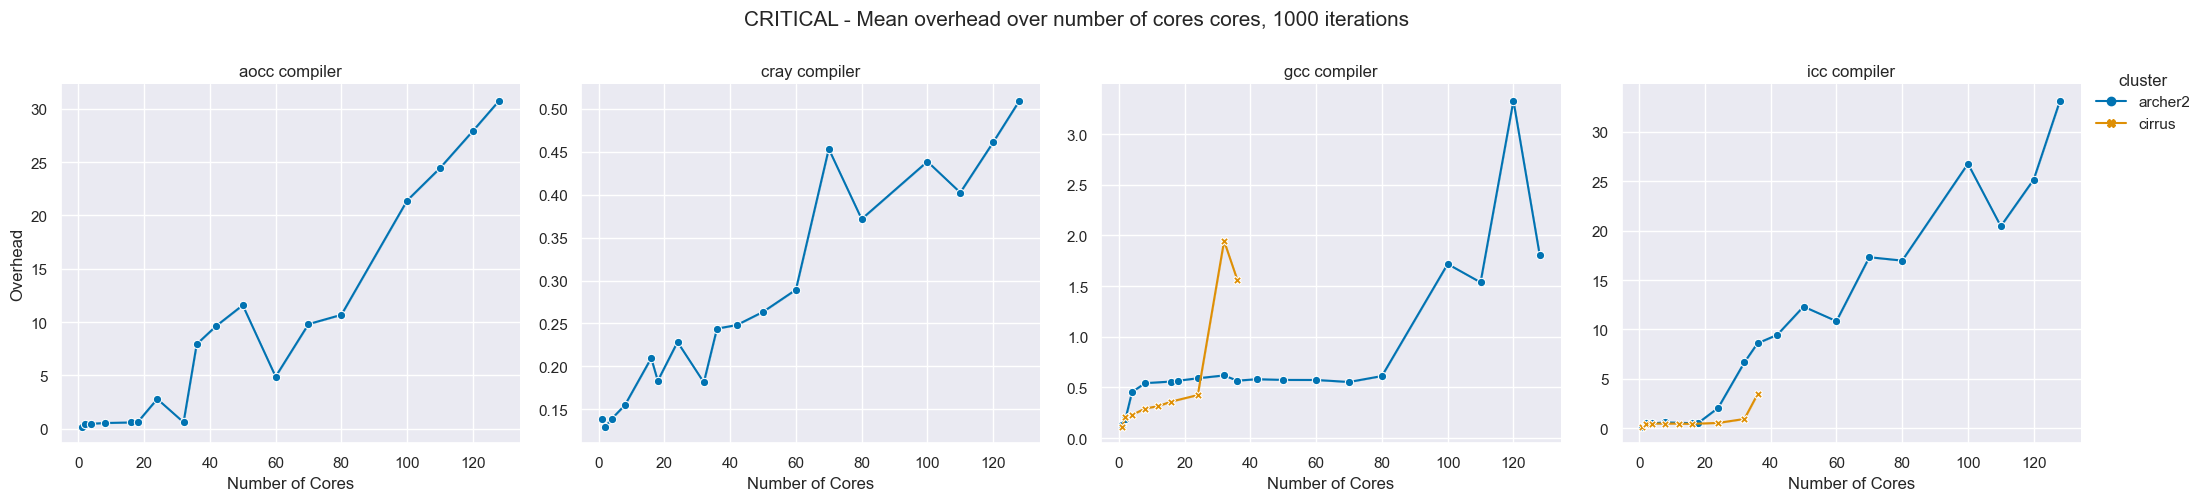

In [6]:
#plot speedup graph
rdf = critical_1000iter[critical_1000iter["name"] == "CRITICAL"]
title="CRITICAL - Mean overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="cluster",style="cluster",dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

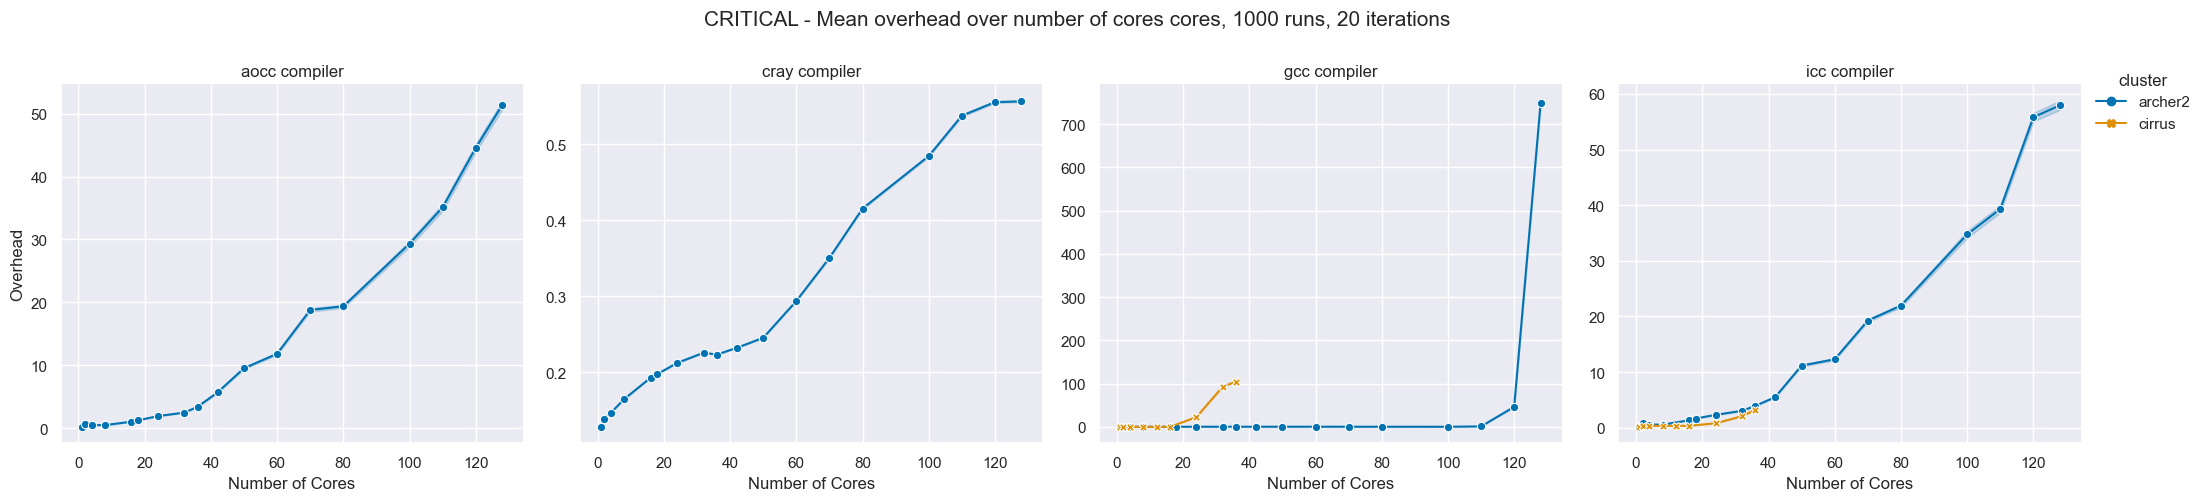

In [23]:
#plot speedup graph
rdf = critical_1000runs[critical_1000runs["name"] == "CRITICAL"]
title="CRITICAL - Mean overhead over number of cores cores, 1000 runs, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="compiler",hue="cluster",style="cluster",dashes=False,markers=True,facet_kws=dict(sharey=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.05, 0.9))
plot.set_titles("{col_name} compiler")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

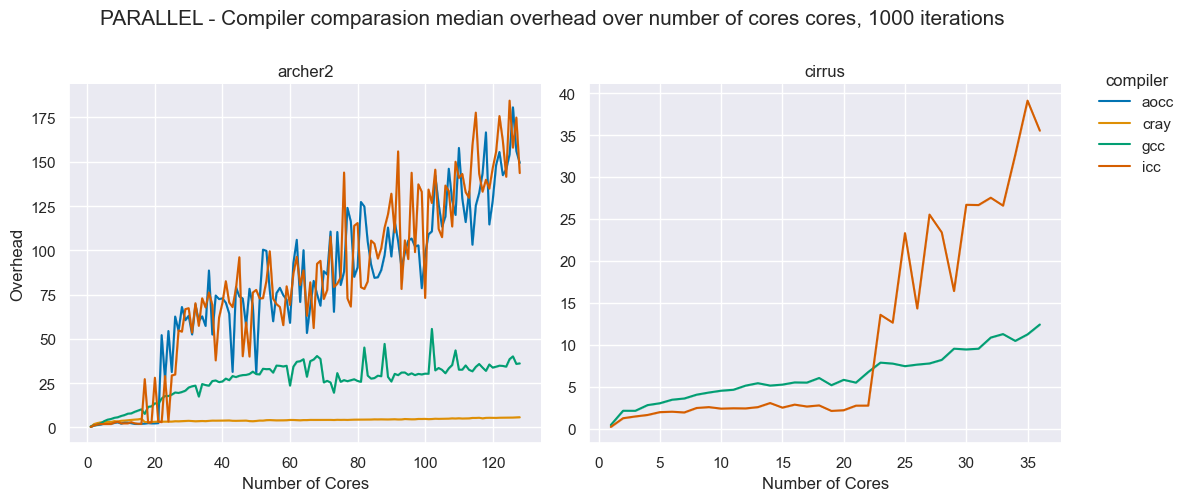

In [24]:
#plot speedup graph
rdf = parallel_1000iter[parallel_1000iter["name"] == "PARALLEL"]
title="PARALLEL - Compiler comparasion median overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_53145/528585995.py:10: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


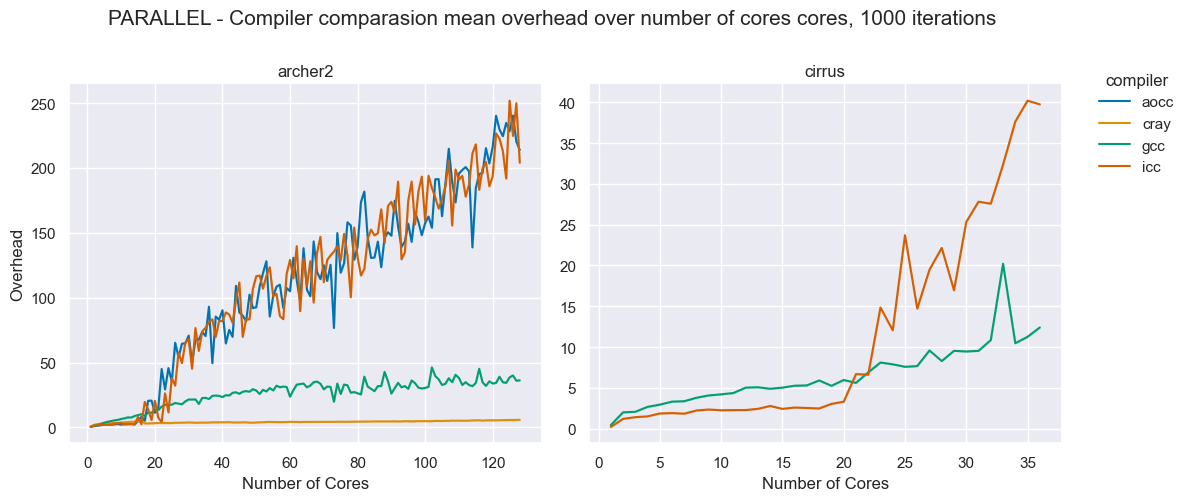

In [4]:
#plot speedup graph
rdf = parallel_1000iter[parallel_1000iter["name"] == "PARALLEL"]
title="PARALLEL - Compiler comparasion mean overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="cluster",hue="compiler",facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

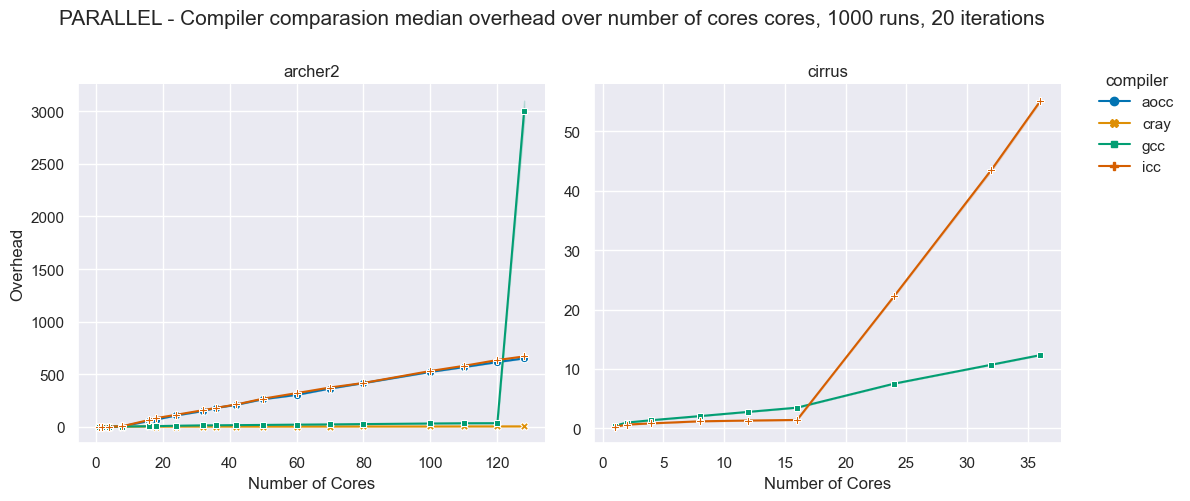

In [25]:
#plot speedup graph
rdf = parallel_1000runs[parallel_1000runs["name"] == "PARALLEL"]
title="PARALLEL - Compiler comparasion mean overhead over number of cores cores, 1000 runs, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

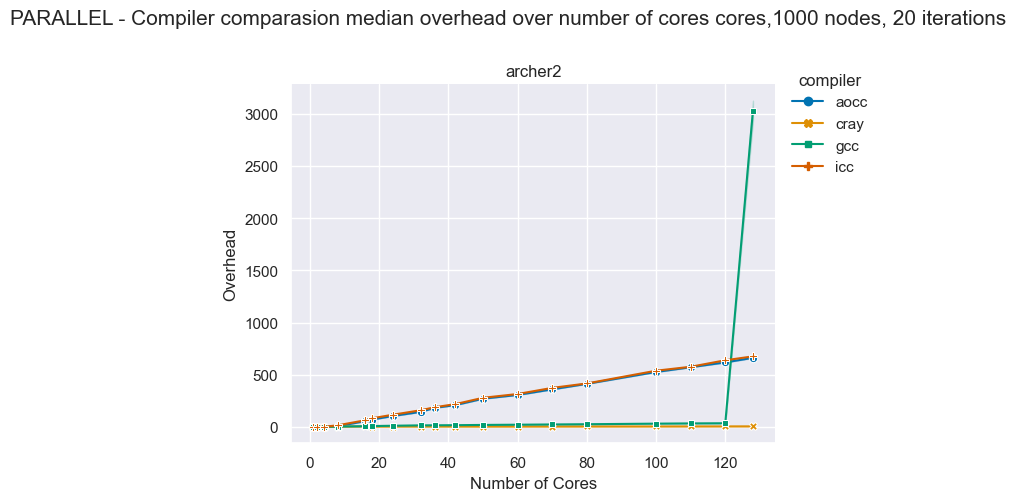

In [26]:
#plot speedup graph
rdf = archer2_1000n_parallel[archer2_1000n_parallel["name"] == "PARALLEL"]
title="PARALLEL - Compiler comparasion median overhead over number of cores cores,1000 nodes, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

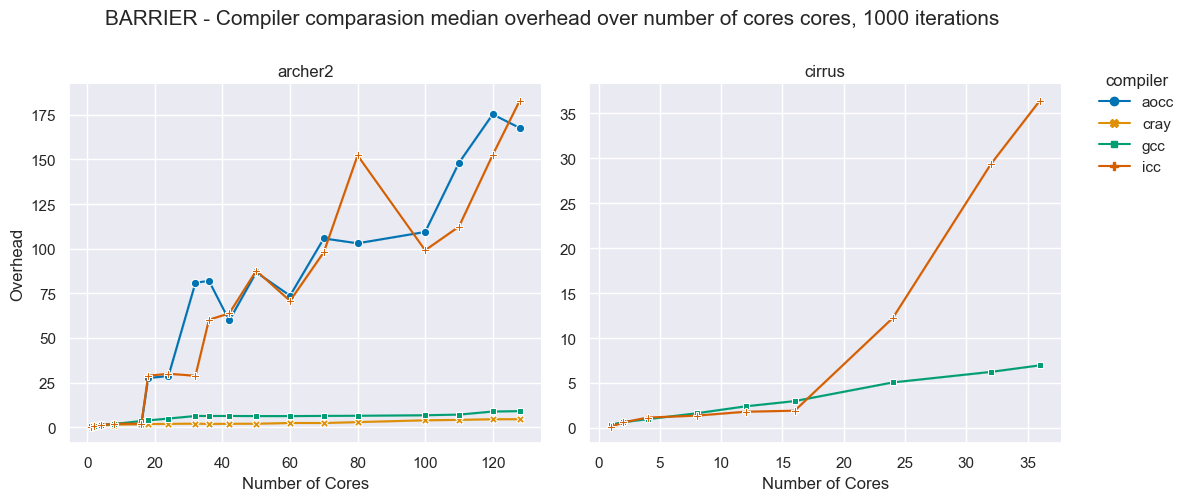

In [27]:
#plot speedup graph
rdf = barrier_1000iter[barrier_1000iter["name"] == "BARRIER"]
title="BARRIER - Compiler comparasion median overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

/Users/koa/miniconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/v7/33cfbrz13h5867ms72qh23y00000gn/T/ipykernel_53145/3438460433.py:10: UserWarning: The figure layout has changed to tight
  plot.fig.tight_layout()


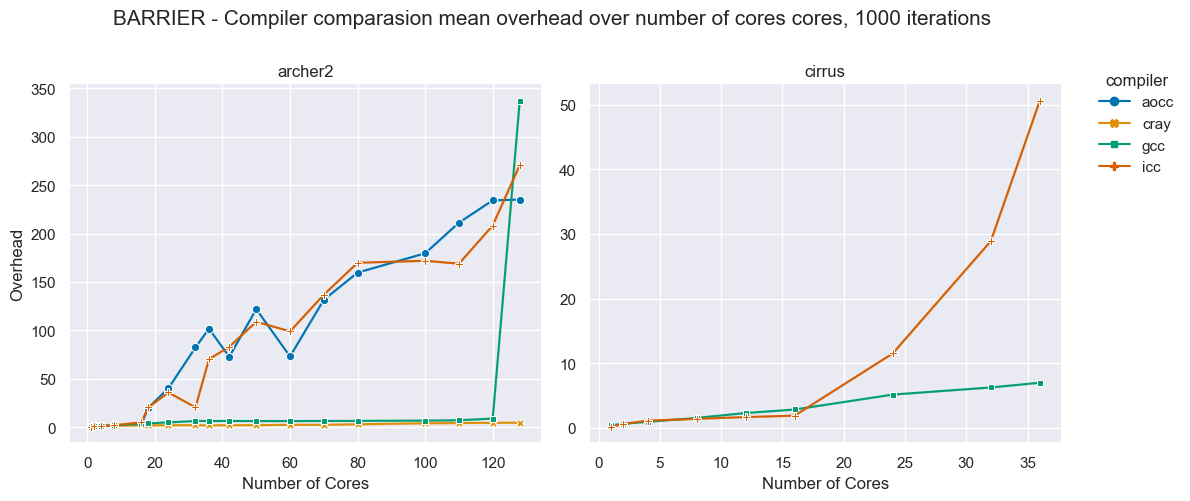

In [3]:
#plot speedup graph
rdf = barrier_1000iter[barrier_1000iter["name"] == "BARRIER"]
title="BARRIER - Compiler comparasion mean overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="mean", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

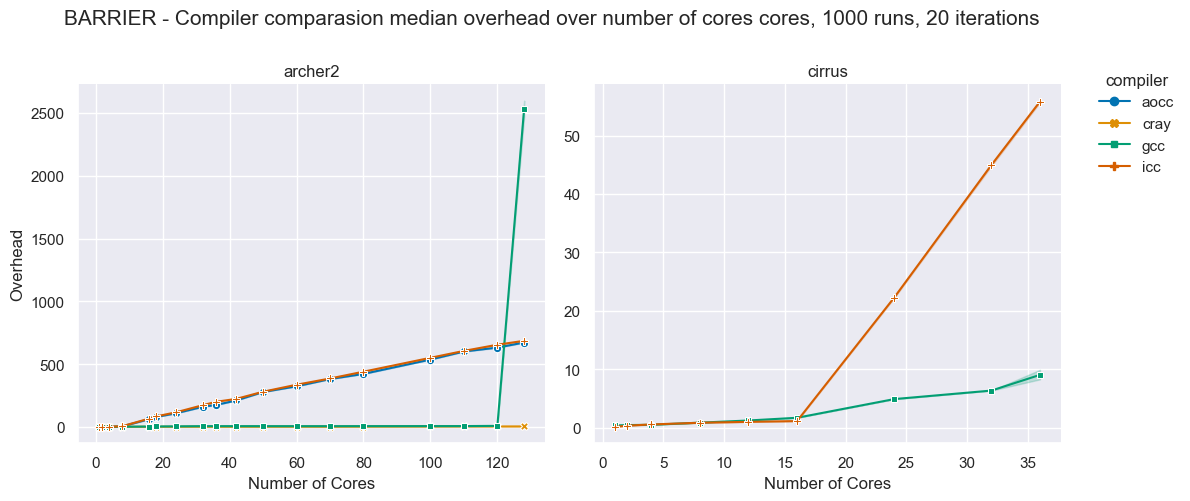

In [28]:
#plot speedup graph
rdf = barrier_1000runs[barrier_1000runs["name"] == "BARRIER"]
title="BARRIER - Compiler comparasion median overhead over number of cores cores, 1000 runs, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

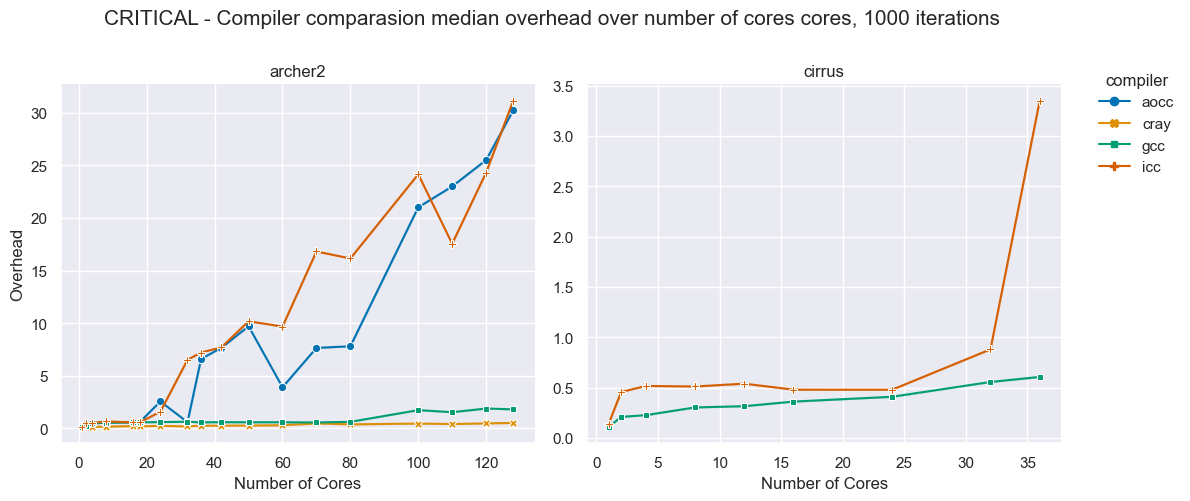

In [29]:
#plot speedup graph
rdf = critical_1000iter[critical_1000iter["name"] == "CRITICAL"]
title="CRITICAL - Compiler comparasion median overhead over number of cores cores, 1000 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

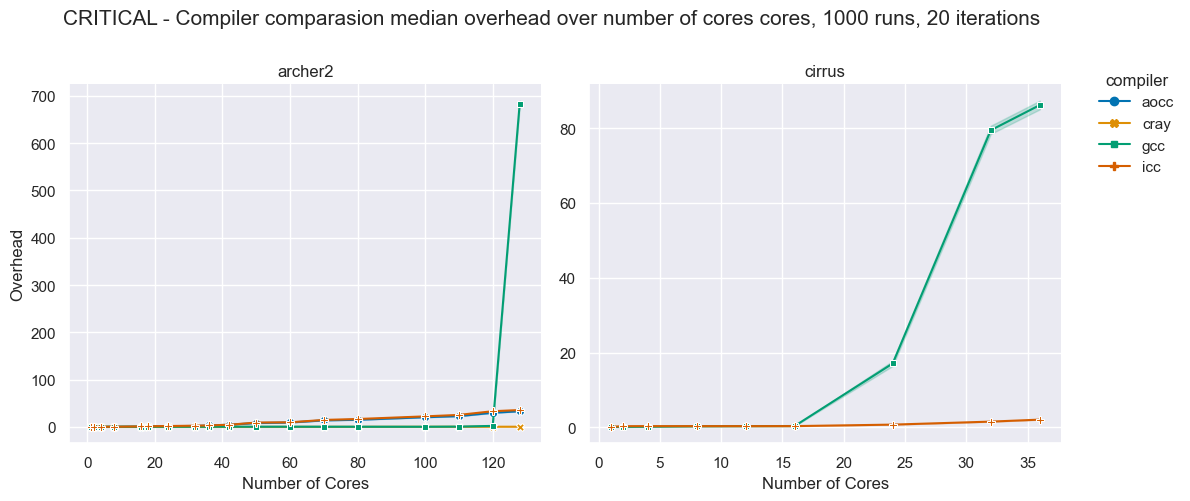

In [30]:
#plot speedup graph
rdf = critical_1000runs[critical_1000runs["name"] == "CRITICAL"]
title="CRITICAL - Compiler comparasion median overhead over number of cores cores, 1000 runs, 20 iterations";
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.1, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

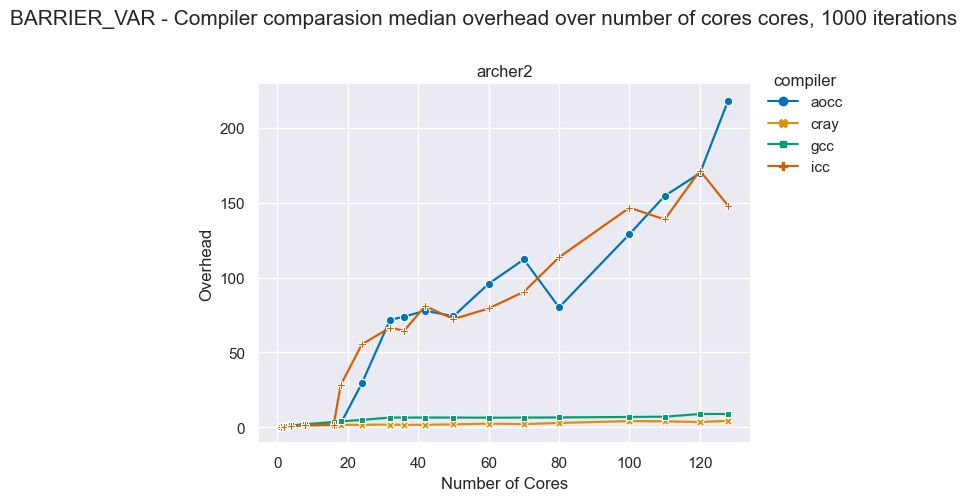

In [31]:
#plot speedup graph
rdf = archer2_1000i_barrier_var[archer2_1000i_barrier_var["name"] == "BARRIER_VAR"]
title="BARRIER_VAR - Compiler comparasion median overhead over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

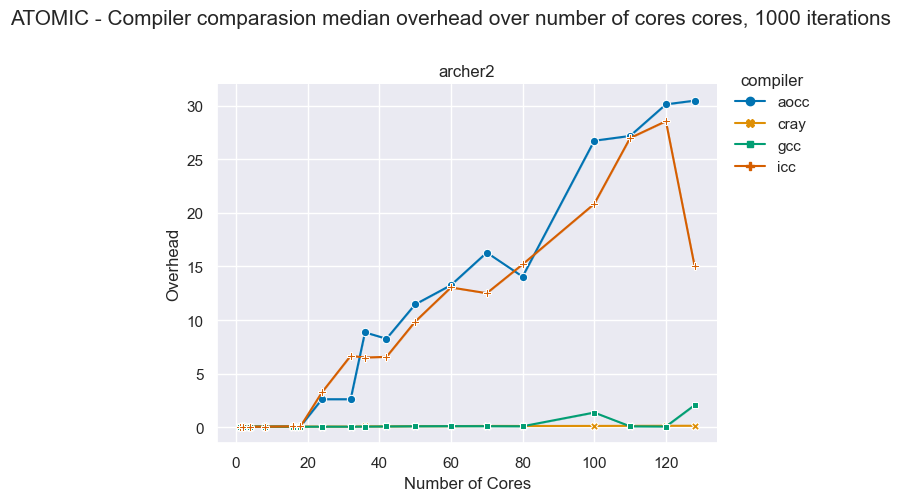

In [32]:
#plot speedup graph
rdf = archer2_1000i_atomic[archer2_1000i_atomic["name"] == "ATOMIC"]
title="ATOMIC - Compiler comparasion median overhead over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdf

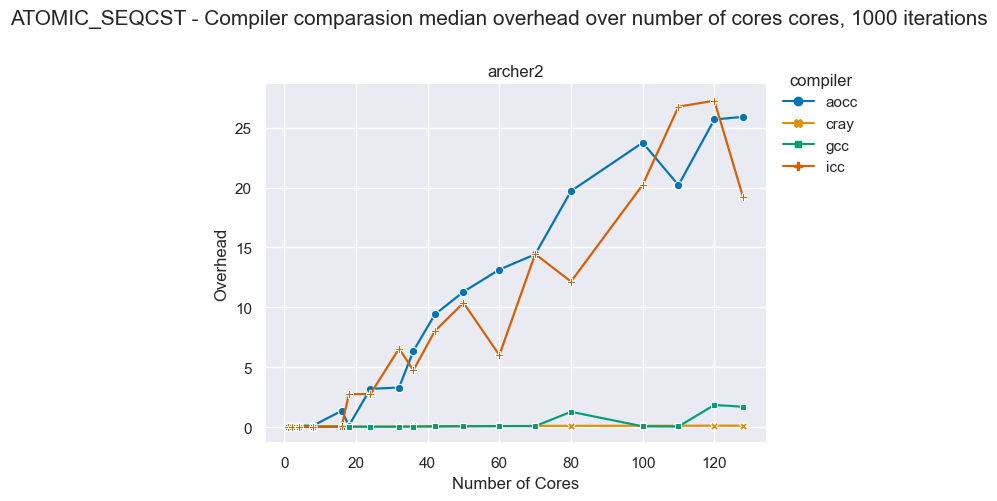

In [33]:
#plot speedup graph
rdf = archer2_1000i_atomic_seqcst[archer2_1000i_atomic_seqcst["name"] == "ATOMIC_SEQCST"]
title="ATOMIC_SEQCST - Compiler comparasion median overhead over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")

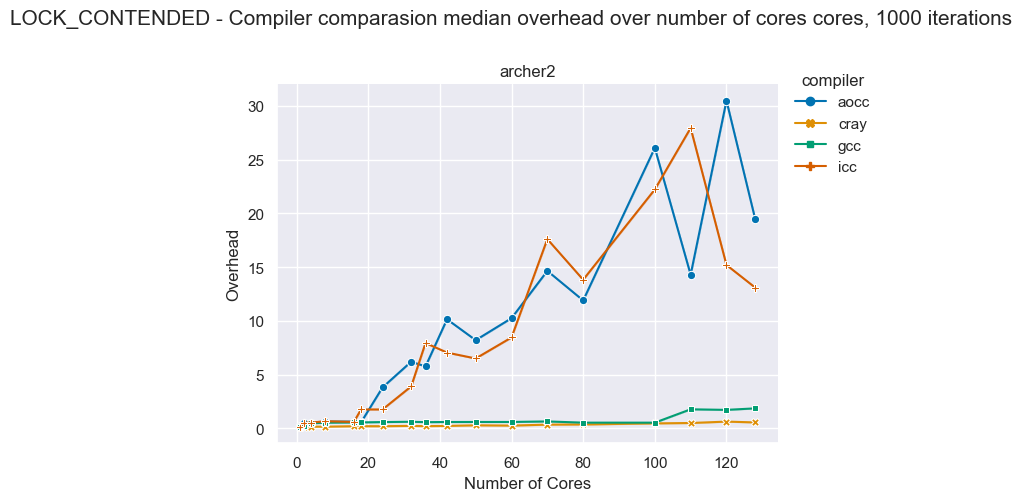

In [34]:
#plot speedup graph
rdf = archer2_1000i_lock_contended[archer2_1000i_lock_contended["name"] == "LOCK_CONTENDED"]
title="LOCK_CONTENDED - Compiler comparasion median overhead over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")

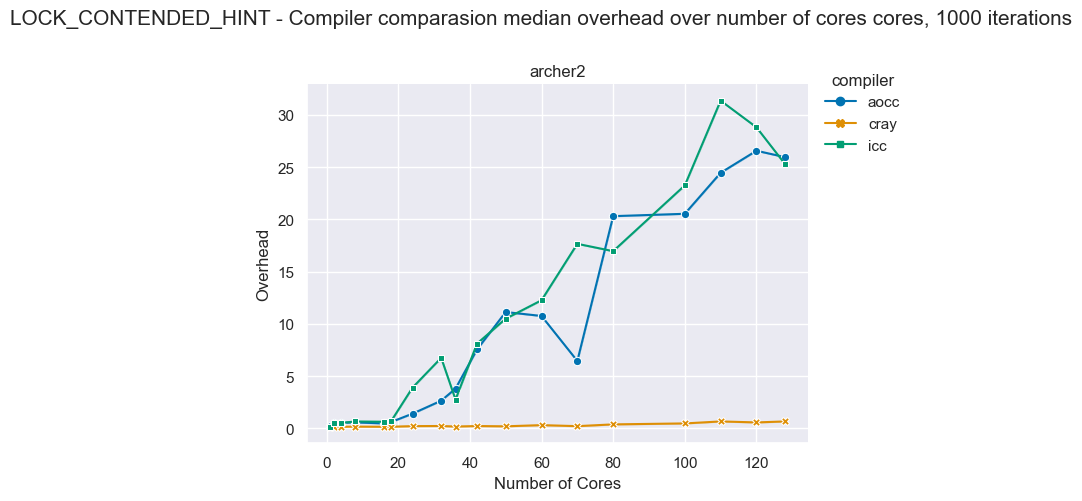

In [35]:
#plot speedup graph
rdf = archer2_1000i_lock_contended_hint[archer2_1000i_lock_contended_hint["name"] == "LOCK_CONTENDED_HINT"]
title="LOCK_CONTENDED_HINT - Compiler comparasion median overhead over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")

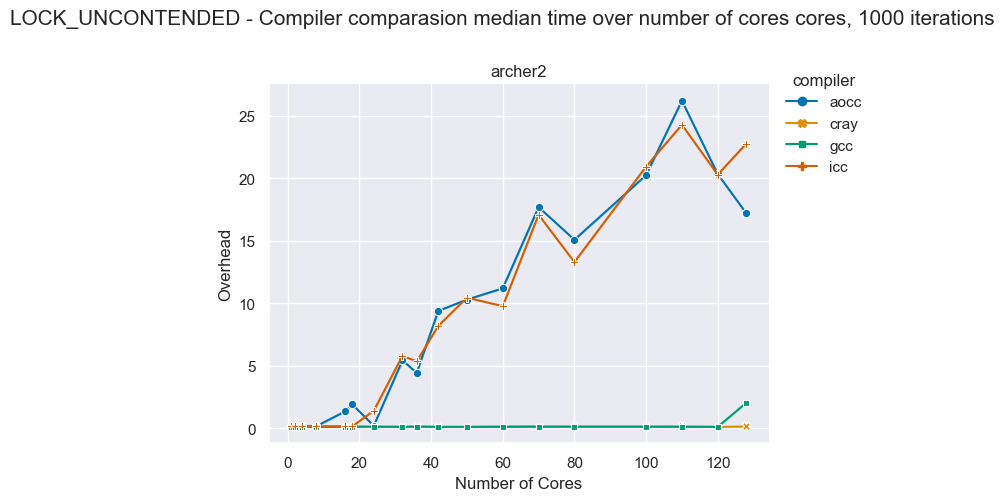

In [36]:
#plot speedup graph
rdf = archer2_1000i_lock_uncontended[archer2_1000i_lock_uncontended["name"] == "LOCK_UNCONTENDED"]
title="LOCK_UNCONTENDED - Compiler comparasion median time over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")

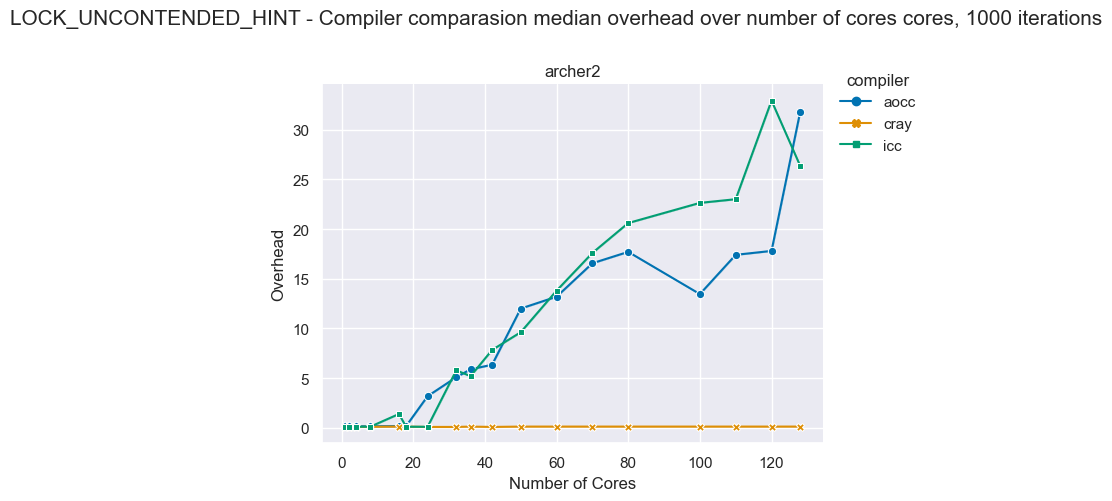

In [37]:
#plot speedup graph
rdf = archer2_1000i_lock_uncontended_hint[archer2_1000i_lock_uncontended_hint["name"] == "LOCK_UNCONTENDED_HINT"]
title="LOCK_UNCONTENDED_HINT - Compiler comparasion median overhead over number of cores cores, 1000 iterations"
plot = sns.relplot(data=rdf, x="cores", y="median", kind="line",col="cluster",hue="compiler",style="compiler",dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Number of Cores", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")

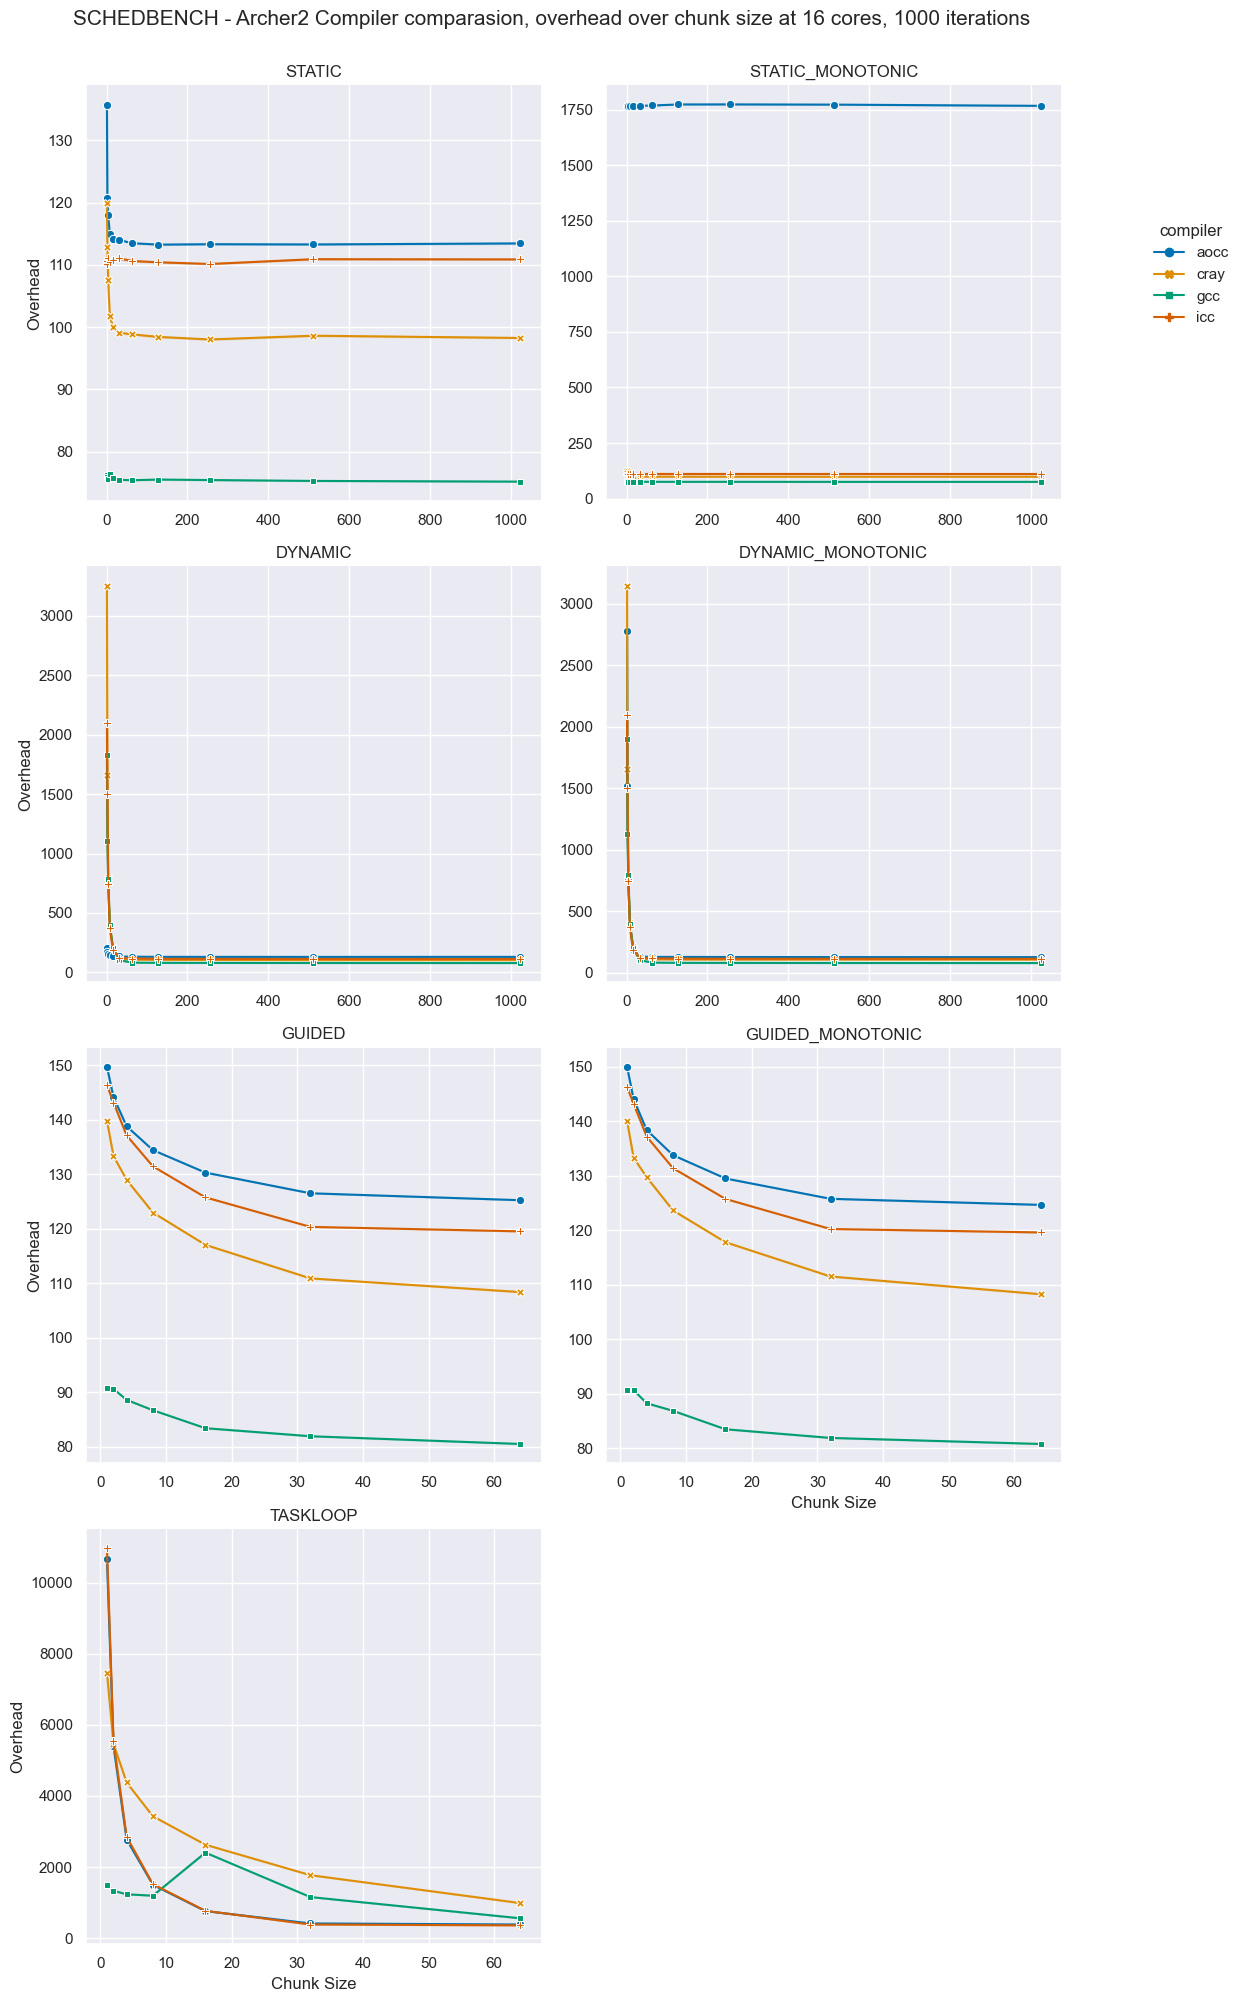

In [38]:
#plot speedup graph
rdp = archer2_1000i_schedbench.dropna(subset=["chunk size"])
rdf = rdf[rdf["cores"] == 16]
title="SCHEDBENCH - Archer2 Compiler comparasion, overhead over chunk size at 16 cores, 1000 iterations"
plot = sns.relplot(data=rdp, x="chunk size", y="time", kind="line",col="name",hue="compiler",style="compiler",col_wrap=2,dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set_axis_labels("Chunk Size", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdp

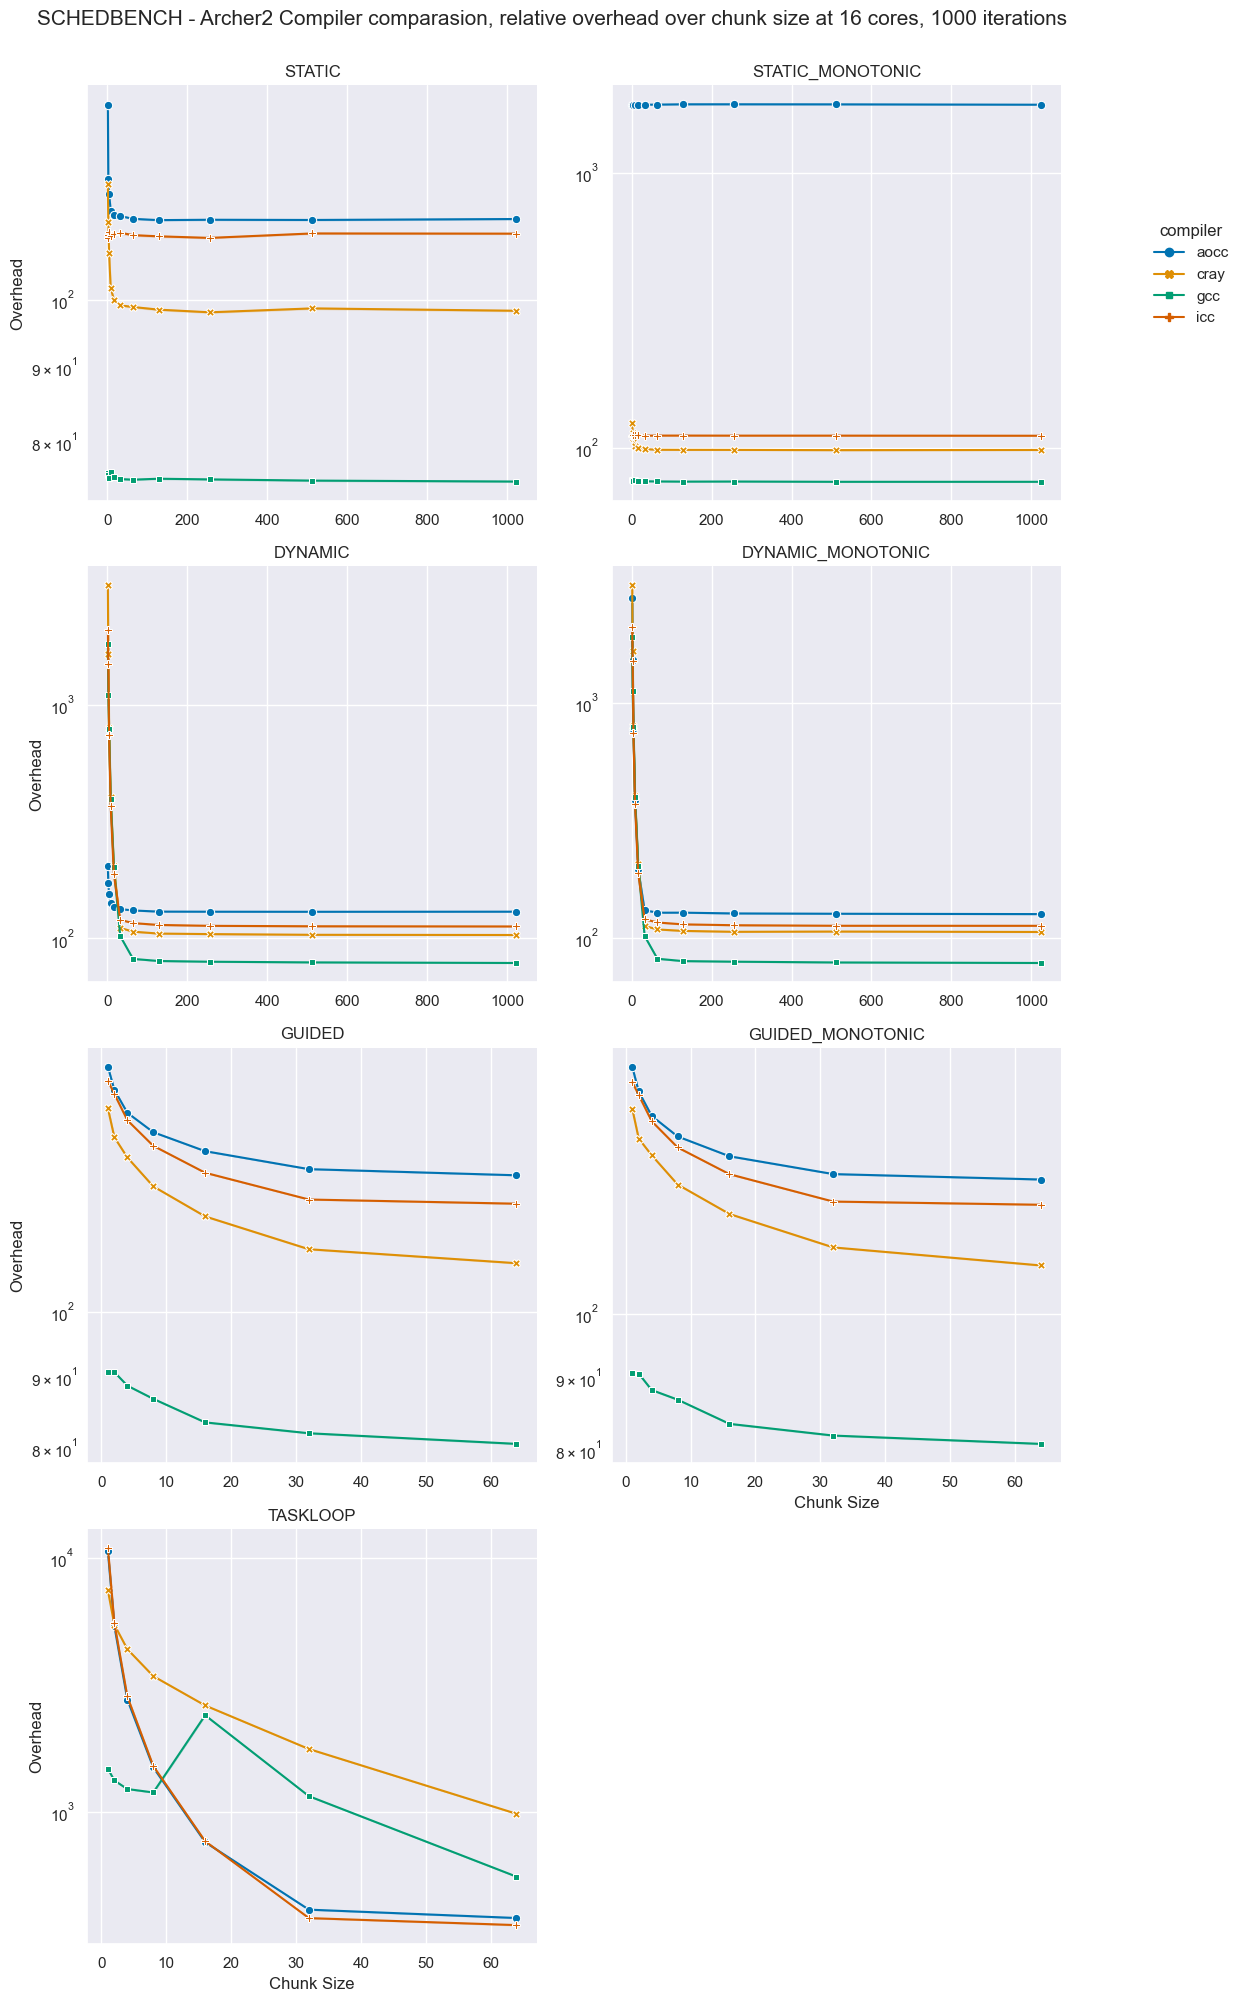

In [39]:
#plot speedup graph
rdp = archer2_1000i_schedbench.dropna(subset=["chunk size"])
rdf = rdf[rdf["cores"] == 16]
title="SCHEDBENCH - Archer2 Compiler comparasion, relative overhead over chunk size at 16 cores, 1000 iterations"
plot = sns.relplot(data=rdp, x="chunk size", y="time", kind="line",col="name",hue="compiler",style="compiler",col_wrap=2,dashes=False,markers=True,facet_kws=dict(sharey=False,sharex=False))
plot.set(yscale="log")
plot.set_axis_labels("Chunk Size", "Overhead")
plot.fig.suptitle(title, size=15,y=1.00,x=0.515)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.15, 0.9))
plot.set_titles("{col_name}")
# plot.set_xticklabels(rotation=90)
plot.fig.tight_layout()
plt.savefig('figures/' + title + '.png', bbox_inches = "tight")
del rdp